## **Working with Cervical Cancer Dataset**
##### *Author :: Rajesh Sharma*

---

##### **The aim of this Notebook is to gain better understanding on below techniques by applying them on a real-world dataset:**

- *Missing Values Analysis* --> DONE
- *Effective EDA* --> DONE
- *Ensuring zero Data Leakage* --> In-progress
- *Handling Missing Values* --> DONE
- *Handling Outliers*
- *Handling Categorical and Numerical Features*
- *Handling Scaling/Normalizing*
- *CV and Nested cross-validation*
- *TRAIN and TEST from same distributions* --> DONE
- *Hyper-parameter tuning*
- *Feature Selection*

##### **`Contents`**

1. [Import Packages](#Importing_the_Packages)
2. [Analysis :: Missing Values](#Analyzing_Missing_Values)
3. [Understanding Dataset](#Building_Dataset_Understanding)
4. [Exploratory Data Analysis](#Exploratory_Data_Analysis)

##### **Importing_the_Packages**

In [1]:
import logging
logging.basicConfig(filename="Cervical_Cancer_Prediction.log",
                    filemode='w',
                    level=logging.INFO,
                    format="%(asctime)s : %(levelname)s : %(message)s")

try :
    logging.info("#### Packages import ####")
    import os
    import sys
    import warnings
    import shutil
    import re
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    import seaborn as sns
    import sklearn
    import scipy.stats as sc_sts
    import mlxtend

    from tqdm import tqdm
    from Scripts.Functions import customize_plots, compute_null_percentage, plot_null_values, impute_std_hc_iud, RandomSearchCV_KNN
    from sklearn.preprocessing import StandardScaler, Normalizer
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import train_test_split
    from sklearn.impute import KNNImputer
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
    from sklearn.exceptions import DataConversionWarning
    from pandas.core.common import SettingWithCopyWarning
    
except ImportError as ie:
    # Output expected ImportErrors
    logging.error(msg=ie.__class__.__name__  + " :: Missing Package --> " + ie.name)
except Exception as exception:
    # Output unexpected Exceptions
    logging.info("#### Exceptions other than ModuleImportError ####")
    logging.log(msg=(exception, False))
    logging.log(msg=exception.__class__.__name__ + " :: " + exception.name)

%matplotlib inline

In [2]:
## Some display settings
pd.set_option('display.max_rows',105)
pd.set_option('display.max_columns',50)
warnings.filterwarnings(category=FutureWarning,action='ignore')
warnings.filterwarnings(category=SettingWithCopyWarning,action='ignore')
warnings.filterwarnings(category=DataConversionWarning,action='ignore')

In [3]:
cer_cancer_df = pd.read_csv("Datasets/Cervical_Cancer/kag_risk_factors_cervical_cancer.csv").rename(columns={'Citology':'Cytology'})

In [4]:
cer_cancer_df.shape

(858, 36)

In [5]:
cer_cancer_df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Cytology', 'Biopsy'],
      dtype='object')

#### **The dataset consists of 858 observations. Each record represent an individual patient with the demographic information, habits, and historic medical records.**

#### **Below features represents the patient's diagnosis in 3 classes:**
- *Cancer*
- *CIN*
- *HPV*

#### **Below features contains the result of medical tests performed for identifying the existence of cancer:**
- *Hinselmann*
- *Schiller*
- *Citology*
- *Biopsy*

#### **I believe we can work with this dataset in order to build one of the below solutions:**
- *We can build the Screening Test App for cervical cancer based on the demographic information, habits, and historic medical records. Then, recommend one of the above mentioned tests for detailed level diagnosis.*
- *Or, we can try to predict the patient diagnosis result just like the other medicals tests. However, to implement such a model we would require more data specially the image data of abnormal cells developed in the cervix.*

In [6]:
## Visualization Global Variables
# label_dict = {'family':'Calibri','size':21,'style':'oblique','color':'coral'}
# title_dict = {'family':'Calibri','size':23,'style':'oblique','color':'magenta'}
# wedge_dict = {'linewidth': 1, 'edgecolor': 'black'}
# txt_dict = {'family':'Calibri','size':16,'style':'oblique','color':'k'}

In [7]:
cer_cancer_df.head(15)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


#### **The initial look tells us that the dataset contains some missing values which is quite possible as patients might not have answered every question because of their privacy.**

#### **Two features: `STDs: Time since first diagnosis` and `STDs: Time since last diagnosis` seems to be holding some good percentage of missing values. Thus first of all, I'll find out the NULL values percentage in every feature.**

## ***`Analyzing_Missing_Values`***

### **`Task-1`: Compute Nulls percentage**

In [8]:
nulls_percentage_df = compute_null_percentage(data_df=cer_cancer_df,missing_type='?')

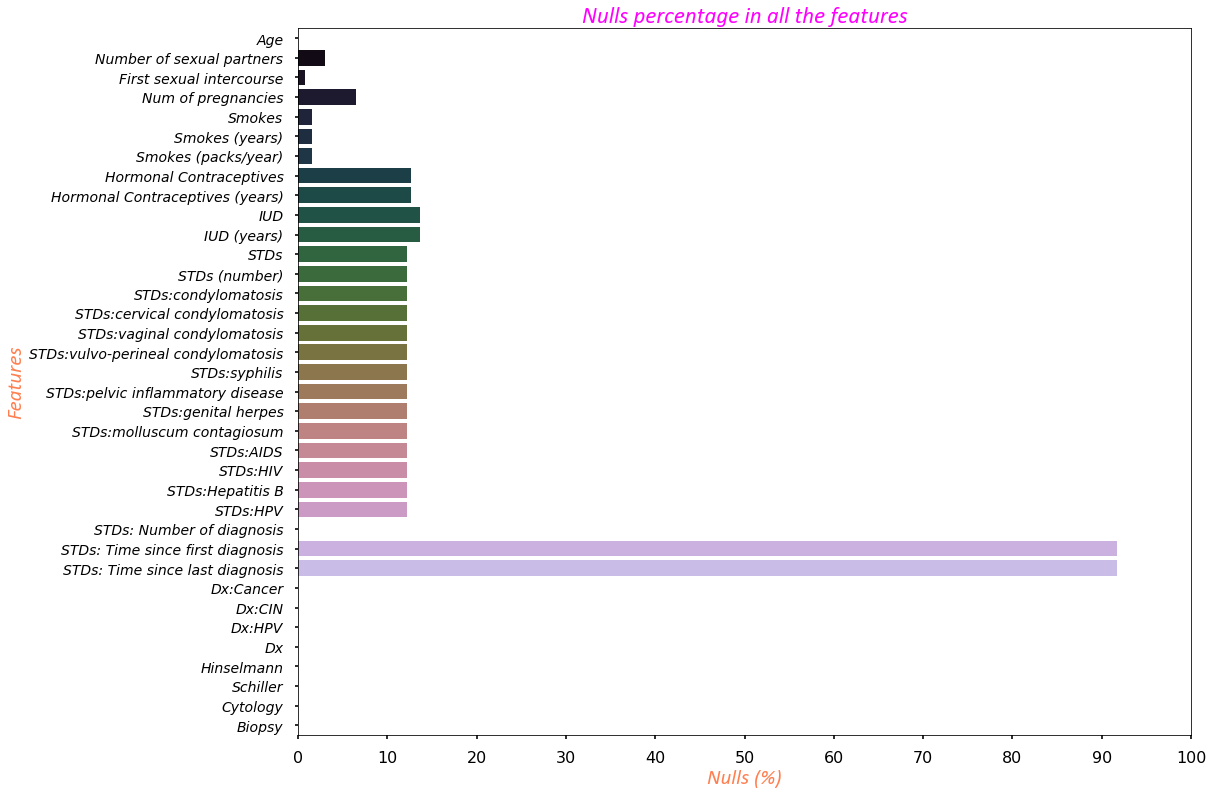

In [9]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(16,13))
    sns.barplot(y='Feature_Name',x='NULL Percentage',data=nulls_percentage_df,palette='cubehelix')
    plt.xlabel('Nulls (%)',fontdict=customize_plots(plt_cust_prop='label'))
    plt.ylabel('Features',fontdict=customize_plots(plt_cust_prop='label'))
    plt.title('Nulls percentage in all the features',fontdict=customize_plots(plt_cust_prop='title'))
    plt.xticks(np.arange(0,101,10))
    plt.yticks(size=14,rotation=0,style='italic',color='k')

#### **Here, two features totally stands-out with more than 90% of null values. These features represents the time period since the patient was first and last diagnosed with STD. This is quite normal as the previously diagnosed patients must have tried to not share this information(from how much time they are suffering from STD). As the null percentages in these two are very high, thus, I'll go ahead and drop these features.**

#### **Some good number of other features has null percentage of around 12%. And, basic information features like Number of sexual partners and number of pregnancies contains around 5% of null values. In these features, first of all, I'll try to examine whether the null values are totally random or following any pattern.**

In [10]:
cer_cancer_df = cer_cancer_df.applymap(lambda val: np.NaN if val == '?' else np.float(val))

In [11]:
cer_cancer_df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,42.0,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,51.0,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
7,26.0,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,45.0,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,44.0,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
cer_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

#### **Above, I fixed the values datatype problem.**

In [13]:
total_values = cer_cancer_df.shape[0] * (cer_cancer_df.shape[1] - 4)
total_null_values = total_values - (np.sum(pd.DataFrame(cer_cancer_df.iloc[:,0:32].count()))[0])
total_null_percent = np.divide(total_null_values,total_values)*100
non_null_values = total_values - total_null_values
non_null_percent = 100 - total_null_percent

In [14]:
print("Total Observations --> {} \nMissing Observations --> {} \nNon-Null Observations --> {}"\
      .format(total_values,total_null_values,non_null_values))

Total Observations --> 27456 
Missing Observations --> 3622 
Non-Null Observations --> 23834


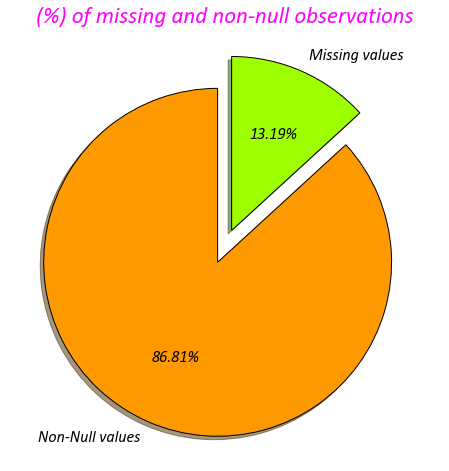

In [15]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(10,8))
    plt.pie(x=[non_null_percent,total_null_percent],
            autopct=lambda pct : "{:.2f}%".format(pct),
            colors=sns.color_palette('gist_rainbow'),
            shadow=True,
            labels=['Non-Null values','Missing values'],
            explode=[0.1,0.1],
            startangle = 90, 
            wedgeprops = customize_plots(plt_cust_prop='wedge'), 
            textprops = customize_plots(plt_cust_prop='txt'))
    plt.title('(%) of missing and non-null observations',fontdict=customize_plots(plt_cust_prop='title'),loc='center')

### **`Task-2`: Does NULL values occurring at Random or following any pattern or rule?**

In [16]:
cer_cancer_df[cer_cancer_df['Number of sexual partners'].isna()].head(15)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
37,37.0,NaN,18.0,1.0,0.0,0.0,0.0,1.0,0.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,37.0,NaN,17.0,5.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,34.0,NaN,NaN,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,30.0,NaN,13.0,3.0,1.0,22.0,3.3,0.0,0.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
157,29.0,NaN,17.0,2.0,0.0,0.0,0.0,1.0,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,29.0,NaN,19.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,25.0,NaN,18.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,25.0,NaN,NaN,2.0,0.0,0.0,0.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,25.0,NaN,18.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265,21.0,NaN,16.0,NaN,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Here, by seeing the above records it looks like patients who didn't provided basic details like `Number of sexual partners`, `First sexual intercourse` and `Hormonal Contraceptives` have also not mentioned the information in the STDs features. I need to verify this.**

In [17]:
cer_cancer_df[cer_cancer_df['Number of sexual partners'].isna()].shape

(26, 36)

#### **A total of 26 records where Sexual Partners details are missing.**

#### **CASE - I :: `Number of Sexual Partners` and `First Sexual Intercourse` are NULL**

In [18]:
cer_cancer_df[(cer_cancer_df['Number of sexual partners'].isna()) & (cer_cancer_df['First sexual intercourse'].isna())]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
71,34.0,NaN,NaN,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,25.0,NaN,NaN,2.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Out of the above 26 records, only 2 patients didn't provide the 'First sexual intercourse' and 1 out of these didn't even shared the other HC and STDs details.** 

#### **CASE - II :: `Number of Sexual Partners` and `Hormonal Contraceptives` are NULL**

In [19]:
cer_cancer_df[(cer_cancer_df['Number of sexual partners'].isna()) & (cer_cancer_df['Hormonal Contraceptives'].isna())]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
71,34.0,NaN,NaN,3.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,29.0,NaN,19.0,2.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,25.0,NaN,18.0,2.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,25.0,NaN,18.0,2.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
272,23.0,NaN,17.0,NaN,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,23.0,NaN,19.0,2.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391,17.0,NaN,15.0,2.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,18.0,NaN,16.0,2.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
417,19.0,NaN,17.0,2.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
460,14.0,NaN,14.0,1.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
cer_cancer_df[(cer_cancer_df['Number of sexual partners'].isna()) & (cer_cancer_df['Hormonal Contraceptives'].isna())].shape

(12, 36)

#### **Here is a good finding, patients who didn't provided the information of their Sexual Partners and HC, also not mentioned anything about STD's. For these records, if we see the diagnosis and medical test features then all are negatives. Thus, hypothetically speaking the dataset is saying that these patients are not suffering from CIN, HPV or Cancer. And, they didn't even went into any of the further medical tests. Now, this situation may be due to the below points:**
- *Here does NULL values means that these patients never consumed HC and never diagnosed with any form of STI in the past? That's why, they have left it blank.*
    - *As per the dataset description the above justification doesn't holds true because these NaN are the values where patients have intentionally didn't shared this private information.*

#### **So, the focus point here is that these features are really important to classify the disease and for further medical diagnosis. And, there is a very high chance that these patients must have been suffering from STI or suffered in the past. Thus, imputing these NULL values based on the rest of the data can lead to incorrect results. Hence, we can try below approaches:**
- *Assign all these NULL values as -1 and we simply tell our model that if these features holds -1 then we cannot recommend anything to you. This is quite right because not even doctor can prescribe or recommend anything in this kind of a situation.*
- *Assuming that these patients has a history of STI. Then, using the positive observations we can fill these NULL values.*
- *Or, we can simply drop these records.*

#### **CASE - III :: `Number of Sexual Partners` is NULL but `Hormonal Contraceptives` is not NULL**

In [21]:
cer_cancer_df[(cer_cancer_df['Number of sexual partners'].isna()) & ~(cer_cancer_df['Hormonal Contraceptives'].isna())].shape

(14, 36)

In [22]:
cer_cancer_df[(cer_cancer_df['Number of sexual partners'].isna()) & ~(cer_cancer_df['Hormonal Contraceptives'].isna())]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
37,37.0,NaN,18.0,1.0,0.0,0.0,0.0,1.0,0.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,37.0,NaN,17.0,5.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,30.0,NaN,13.0,3.0,1.0,22.0,3.3,0.0,0.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
157,29.0,NaN,17.0,2.0,0.0,0.0,0.0,1.0,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,25.0,NaN,NaN,2.0,0.0,0.0,0.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265,21.0,NaN,16.0,NaN,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,20.0,NaN,16.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
324,33.0,NaN,16.0,4.0,0.0,0.0,0.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,20.0,NaN,16.0,1.0,0.0,0.0,0.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
481,31.0,NaN,18.0,2.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **No hidden pattern in NULL values of the above records except the below one.** 

In [23]:
cer_cancer_df.iloc[131:132,:]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
131,30.0,NaN,13.0,3.0,1.0,22.0,3.3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


#### **A serious finding here, above record shows that the patient has a history of smoking and never consumed HC. But, suffering from one of the forms of STD which is HIV. In addition to this, she was previously diagnosed with HIV 3 years ago(most probably this value is in years but not mentioned in the dataset description).**

#### **Now, the focus point here is that this patient this HIV +ve but not suffering from Cancer/CIN/HPV. And, recommended for further medical tests.**

#### ***A quote from one of the below links:***
#### *`"Cervical cancer is an AIDS-defining illness, since women living with HIV who become infected with HPV are more likely to develop pre-invasive lesions that can, if left untreated, quickly progress to invasive cancer—women living with HIV are four to five times more likely to develop invasive cervical cancer. HPV infection has been found to significantly increase the risk of HIV transmission for both men and women."`*

#### **Below links are helpful in understanding how HIV and Cervical Cancer are related to each other.**
[Link-1](https://www.unaids.org/en/resources/presscentre/featurestories/2019/may/20190531_cervical-cancer-hiv)

[Link-2](https://www.unaids.org/en/resources/presscentre/featurestories/2018/october/cervical-cancer-and-hiv)

#### **Below link is helpful understanding HIV Risk Factors and Transmission**
[Link-1](https://www.webmd.com/hiv-aids/guide/sexual-health-aids#2-3)


#### **CASE - IV :: `First sexual intercourse` is NULL**

In [24]:
cer_cancer_df[cer_cancer_df['First sexual intercourse'].isna()]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
2,34.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,34.0,NaN,NaN,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182,25.0,3.0,NaN,4.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,25.0,NaN,NaN,2.0,0.0,0.0,0.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
833,34.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,37.0,3.0,NaN,0.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
837,31.0,9.0,NaN,1.0,1.0,11.0,5.5,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **One of the above records we have already analysed earlier and rest seems to be having random null values.**

#### **CASE - IV :: `Num of pregnancies` and `Hormonal Contraceptives` are NULL**

In [25]:
cer_cancer_df[(cer_cancer_df['Num of pregnancies'].isna()) & (cer_cancer_df['Hormonal Contraceptives'].isna())].shape

(7, 36)

In [26]:
cer_cancer_df[(cer_cancer_df['Num of pregnancies'].isna()) & (cer_cancer_df['Hormonal Contraceptives'].isna())]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
272,23.0,NaN,17.0,NaN,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
544,17.0,2.0,12.0,NaN,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
696,19.0,2.0,16.0,NaN,1.0,1.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
700,28.0,1.0,17.0,NaN,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
701,29.0,2.0,17.0,NaN,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
705,44.0,3.0,23.0,NaN,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
819,14.0,1.0,14.0,NaN,0.0,0.0,0.00,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **A very similar kind of a finding here, patients who hide the basic details like 'Number of pregnancies' and HC usage, also hide the STDs information. So, there is a very high chance that these patients must have been suffering from STI or suffered in the past. Thus, imputing these NULL values based on the rest of the data can lead to incorrect results. Hence, we can try below approaches:**
- *Assign all these NULL values as -1 and we simply tell our model that if these features holds -1 then we cannot recommend anything to you. This is quite right because not even doctor can prescribe or recommend anything in this kind of a situation.*
- *Assuming that these patients has a history of STI. Then, using the positive observations we can fill these NULL values.*
- *Or, we can simply drop these records.*

#### **CASE - V :: `Num of pregnancies` and `IUD` are NULL but `Hormonal Contraceptives` is not NULL**

In [27]:
cer_cancer_df[(cer_cancer_df['Num of pregnancies'].isna()) & ~(cer_cancer_df['Hormonal Contraceptives'].isna()) \
              & (cer_cancer_df['IUD'].isna())]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
9,44.0,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.00,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,37.0,2.0,18.0,NaN,0.0,0.000000,0.0,0.0,0.00,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,15.0,15.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
123,29.0,5.0,20.0,NaN,0.0,0.000000,0.0,1.0,2.00,NaN,NaN,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,26.0,5.0,18.0,NaN,0.0,0.000000,0.0,1.0,1.00,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
421,26.0,3.0,15.0,NaN,0.0,0.000000,0.0,1.0,0.33,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
807,36.0,2.0,18.0,NaN,1.0,19.000000,7.6,1.0,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
814,16.0,1.0,12.0,NaN,0.0,0.000000,0.0,1.0,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
816,21.0,2.0,19.0,NaN,0.0,0.000000,0.0,1.0,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
hc_iud_usage = pd.DataFrame(cer_cancer_df[(cer_cancer_df['Num of pregnancies'].isna()) & \
                                          (cer_cancer_df['Hormonal Contraceptives'].isin([0,1])) & \
                                          (cer_cancer_df['IUD'].isin([0, 1]))]\
                            [['Hormonal Contraceptives','IUD']].value_counts()).reset_index()

hc_iud_usage.columns = ['HC_usage','IUD_usage','Count']
hc_iud_usage

,HC_usage,IUD_usage,Count
0,1.0,0.0,23
1,0.0,0.0,12
2,0.0,1.0,4
3,1.0,1.0,2


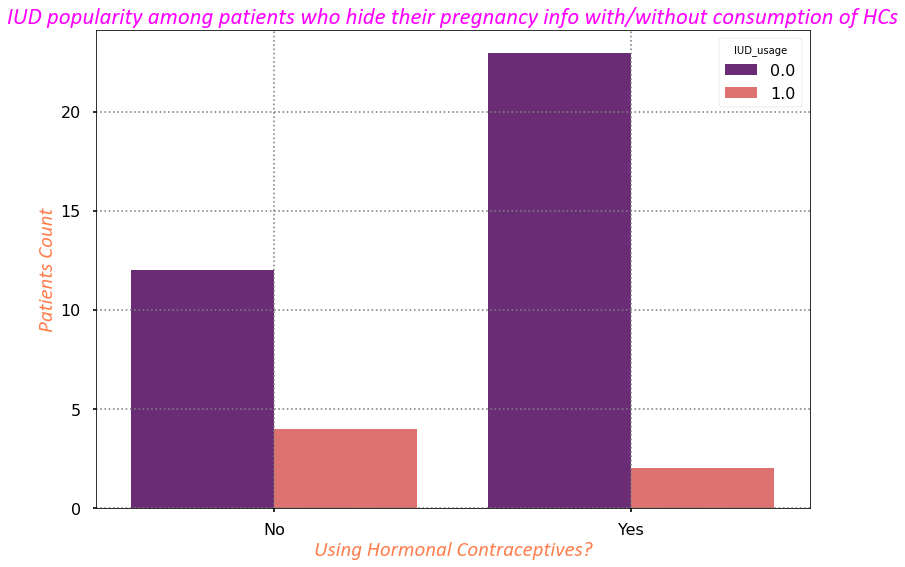

In [29]:
with plt.style.context('seaborn-poster'):
    sns.barplot(x='HC_usage',hue='IUD_usage',y='Count',data=hc_iud_usage,palette='magma')
    plt.xlabel('Using Hormonal Contraceptives?',fontdict=customize_plots(plt_cust_prop='label'))
    plt.ylabel('Patients Count',fontdict=customize_plots(plt_cust_prop='label'))
    plt.title('IUD popularity among patients who hide their pregnancy info with/without consumption of HCs',
              fontdict=customize_plots(plt_cust_prop='title'))
    plt.xticks(ticks=[0.0,1.0],labels=['No','Yes'])
    plt.grid(which='major',color='gray',linestyle=':')

#### **Here, I tried to find out whether IUD is more popular among patients who didn't shared their pregnancy information with or without Hormonal Consumption in the past. This plot shows us that IUD is definitely not a popular choice among both types of patients.**

In [30]:
hc_iud_usage_with_preg = pd.DataFrame(cer_cancer_df[~(cer_cancer_df['Num of pregnancies'].isna()) & \
                                          (cer_cancer_df['Hormonal Contraceptives'].isin([0,1])) & \
                                          (cer_cancer_df['IUD'].isin([0, 1]))]\
                            [['Hormonal Contraceptives','IUD']].value_counts()).reset_index()

hc_iud_usage_with_preg.columns = ['HC_usage','IUD_usage','Count']
hc_iud_usage_with_preg

,HC_usage,IUD_usage,Count
0,1.0,0.0,393
1,0.0,0.0,227
2,1.0,1.0,55
3,0.0,1.0,22


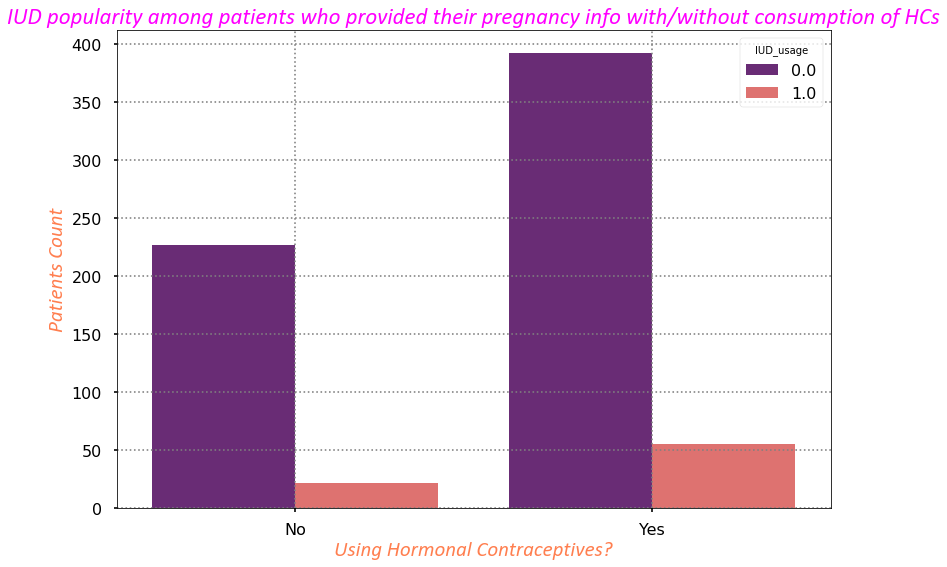

In [31]:
with plt.style.context('seaborn-poster'):
    sns.barplot(x='HC_usage',hue='IUD_usage',y='Count',data=hc_iud_usage_with_preg,palette='magma')
    plt.xlabel('Using Hormonal Contraceptives?',fontdict=customize_plots(plt_cust_prop='label'))
    plt.ylabel('Patients Count',fontdict=customize_plots(plt_cust_prop='label'))
    plt.title('IUD popularity among patients who provided their pregnancy info with/without consumption of HCs',
              fontdict=customize_plots(plt_cust_prop='title'))
    plt.xticks(ticks=[0.0,1.0],labels=['No','Yes'])
    plt.grid(which='major',color='gray',linestyle=':')

#### **IUD is definitely not a very popular method among patients this might be due to following reasons:**
- *Not marketed well as compared to pills*
    - *IUD's are the most effective contraception on the planet – aside from sterilisation or avoiding sex altogether. And apart from those options, they’re also the most popular birth control method worldwide.*
- *Another problem with IUD's might be less awareness on how they are implanted.*

#### **For more info refer below links:**
[Click here](https://www.bbc.com/future/article/20180830-what-to-know-about-the-coil-or-iud-contraceptive-method)

[Click here](https://www.wbur.org/commonhealth/2011/08/11/10-reasons-iud)

#### **One quote from above links:**
##### *`One reason IUDs aren’t more widely used in the United States might be the lack of marketing. Over the years, pharmaceutical giants have chosen to invest heavily in promoting the contraceptive pill instead, which is more profitable.`*

#### **As per the above plot around 12% of patients has preferred IUD after consumption of HC's.**

#### **CASE - VI :: `Smokes` is NULL**

In [32]:
cer_cancer_df[cer_cancer_df['Smokes'].isna()]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
46,36.0,2.0,18.0,3.0,NaN,NaN,NaN,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,30.0,3.0,16.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,25.0,15.0,16.0,2.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279,22.0,2.0,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,21.0,1.0,18.0,2.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451,16.0,1.0,16.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
552,18.0,3.0,16.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
564,26.0,2.0,19.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
648,18.0,2.0,16.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,19.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,38.0,3.0,22.0,2.0,NaN,NaN,NaN,1.0,3.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


#### **Here, these NULLS looks like random as not pattern is quite evident.**

#### **CASE - VII :: `Hormonal Contraceptives`, `IUDs` and `STDs` are NULL**

##### *`Sub_case - 1 :: All STDs are missing but HC and IUD data is present`*

In [33]:
cer_cancer_df[~(cer_cancer_df['IUD'].isna()) & ~(cer_cancer_df['Hormonal Contraceptives'].isna()) & (cer_cancer_df['STDs'].isna())].shape

(4, 36)

In [34]:
cer_cancer_df[~(cer_cancer_df['IUD'].isna()) & ~(cer_cancer_df['Hormonal Contraceptives'].isna()) & (cer_cancer_df['STDs'].isna())]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
323,22.0,2.0,18.0,2.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,22.0,4.0,16.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
595,22.0,1.0,14.0,2.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
757,24.0,3.0,17.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Really cannot do anything about these records as the most important features here are not having data. And, filling these values would be a very risky task as these are boolean features and we cannot even say from which type of STD might be infected. Hence, we can try below approaches:**
- *Assign all these NULL values as -1 and we simply tell our model that if these features holds -1 then we cannot recommend anything to you. This is quite right because not even doctor can prescribe or recommend anything in this kind of a situation.*
- *Assuming that these patients has a history of STI. Then, using the positive observations we can fill these NULL values.*
- *Or, we can simply drop these records.*

##### *`Sub_case - 2 :: All STDs are missing irrespective of HC and IUD data`*

In [35]:
cer_cancer_df[(cer_cancer_df['STDs'].isna())].shape

(105, 36)

##### *`Sub_case - 3 :: All STDs, HC and IUD are missing`*

In [36]:
cer_cancer_df[(cer_cancer_df['IUD'].isna()) & (cer_cancer_df['Hormonal Contraceptives'].isna()) & (cer_cancer_df['STDs'].isna())].shape

(95, 36)

##### *`Sub_case - 4 :: All STDs, HC are missing but IUD are present`*

In [37]:
cer_cancer_df[~(cer_cancer_df['IUD'].isna()) & (cer_cancer_df['Hormonal Contraceptives'].isna()) & (cer_cancer_df['STDs'].isna())].shape

(0, 36)

##### *`Sub_case - 5 :: All STDs, IUD are missing but HC are present`*

In [38]:
cer_cancer_df[(cer_cancer_df['IUD'].isna()) & ~(cer_cancer_df['Hormonal Contraceptives'].isna()) & (cer_cancer_df['STDs'].isna())].shape

(6, 36)

#### **For these 105 records I'll follow any of the below approach:**
- *Assign all these NULL values as -1 and we simply tell our model that if these features holds -1 then we cannot recommend anything to you. This is quite right because not even doctor can prescribe or recommend anything in this kind of a situation.*
- *Or, we can simply drop these records.*

#### **CASE - VIII :: `STDs` are NULL but Diagnosed positive**

In [39]:
cer_cancer_df[(cer_cancer_df['STDs'].isna()) & ((cer_cancer_df['Dx:Cancer']==1) | \
             (cer_cancer_df['Dx:CIN']==1) | \
             (cer_cancer_df['Dx:HPV']==1) | \
             (cer_cancer_df['Dx']==1))]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
769,26.0,2.0,15.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


#### **For this patient majority of the information is mising but she was diagnosed with pre-cancerous condition(CIN).**

## **`Building_Dataset_Understanding`**
##### **`Understanding Cervical Cancer cycle and its medical tests for diagnosis`**

#### **Tests for people with symptoms of cervical cancer**
- [Click here](https://www.cancer.org/cancer/cervical-cancer/detection-diagnosis-staging/how-diagnosed.html)
- [Click here](https://www.mayoclinic.org/diseases-conditions/cervical-cancer/diagnosis-treatment/drc-20352506) 

#### ***1. `Schiller's test`***
- A preliminary test for cancer of the uterine cervix in which the cervix is painted with an aqueous solution of iodine and potassium iodide and which shows up healthy tissue by staining it brown and possibly cancerous tissue as white or yellow due to its failure to take up the stain because of a deficiency of glycogen in the cells.
- More info [here](https://en.wikipedia.org/wiki/Schiller%27s_test)

#### ***2. `Cervical Cytology or PAP-Smear test or PAP-HPV test`***
- A Pap smear, also called a Pap test, is a procedure to test for cervical cancer in women.
- A Pap smear involves collecting cells from your cervix — the lower, narrow end of your uterus that's at the top of your vagina.
- Pap test is usually done in conjunction with a pelvic examination.
- Detecting cervical cancer early with a Pap smear gives you a greater chance at a cure. A Pap smear can also detect changes in your cervical cells that suggest cancer may develop in the future. Detecting these abnormal cells early with a Pap smear is your first step in halting the possible development of cervical cancer.
- For more info refer below links:
    - [Link-1](https://www.mayoclinic.org/tests-procedures/pap-smear/about/pac-20394841)
    - [Link-2](https://www.healthline.com/health/pap-smear)
    - [Link-3](https://www.quebec.ca/en/health/advice-and-prevention/screening-and-carrier-testing-offer/cervical-cancer-screening/cytology-advantages-and-disadvantages/)

#### ***3. `Hinselmann's Colposcopy`***
- The main goal of colposcopy is to prevent cervical cancer by detecting and treating precancerous lesions early. **The procedure was developed by the German physician Hans Hinselmann, with help from Eduard Wirths.**
- For more info refer below links:
    - [Link-1](https://en.wikipedia.org/wiki/Colposcopy)
    - [Link-2](https://embryo.asu.edu/pages/colposcope-and-colposcopy-1925-1980)

#### ***4. `Cervical Biopsy`***
-  A cervical biopsy is a procedure to remove tissue from the cervix to test for abnormal or precancerous conditions, or cervical cancer.
- The cervix is the lower, narrow part of the uterus. It forms a canal that opens into the vagina.
- Cervical biopsies can be done in several ways. The biopsy can remove a sample of tissue for testing. It can also be used to completely take out abnormal tissue. It can also treat cells that may turn into cancer.
- For more info refer below links:
    - [Link-1](https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/cervical-biopsy)

How can you get HPV?

Anyone who’s had sexual skin-to-skin contact is at risk for HPV infection. Other factors that may put someone at an increased risk for HPV infection include:

    increased number of sexual partners
    unprotected vaginal, oral, or anal sex
    a weakened immune system
    having a sexual partner that has HPV

If you contract a high-risk type of HPV, some factors can make it more likely that the infection will continue and may develop into cancer:

    a weakened immune system
    having other STIs, such as gonorrhea, chlamydia, and herpes simplex
    chronic inflammation
    having many children (cervical cancer)
    using oral contraceptives over a long period of time (cervical cancer)
    using tobacco products (mouth or throat cancer)
    receiving anal sex (anal cancer)


HPV Tests

Visual Inspection Tests:
1. VIA
2. VILI or Schiller test

https://screening.iarc.fr/doc/RH_via_evidence.pdf

https://en.wikipedia.org/wiki/Vinegar_test

2. Pap Test or Cytology https://www.mayoclinic.org/tests-procedures/pap-smear/about/pac-20394841
3. DNA Test

https://www.mayoclinic.org/diseases-conditions/hpv-infection/diagnosis-treatment/drc-20351602


Cervical Cancer? https://www.cancer.org/cancer/cervical-cancer/about/what-is-cervical-cancer.html

What is Carcinoma? https://www.webmd.com/cancer/what-is-carcinoma#1

Adenocarcinoma? https://www.webmd.com/cancer/what-is-adenocarcinoma#1

Squamous Carcinoma? https://www.webmd.com/melanoma-skin-cancer/melanoma-guide/squamous-cell-carcinoma#1

### **False Negatives reported by Medical Tests**
#### **`NOTE` :: Need to find the strategy to deal with these records in pre-processing phase**

In [40]:
medical_tests_fp = cer_cancer_df[((cer_cancer_df['Dx:Cancer']==1) | \
             (cer_cancer_df['Dx:CIN']==1) | \
             (cer_cancer_df['Dx:HPV']==1) | \
             (cer_cancer_df['Dx']==1)) & \
             ((cer_cancer_df['Hinselmann']==0) & (cer_cancer_df['Schiller']==0) & (cer_cancer_df['Cytology']==0) & \
              (cer_cancer_df['Biopsy']==0))][['Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Cytology','Biopsy']]

print(medical_tests_fp.shape)
medical_tests_fp

(17, 8)


,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
109,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
197,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
229,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
372,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
432,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
652,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
654,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
738,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


#### **These records are some serious findings, here all the medical tests features showing 0, however, patients have positive signs of infection that means these tests didn't indicated any of the below points and misclassified the patients as False Negatives:**
- *`HPV infections`*
- *`Existence of pre-cancerous abnormal cells growth`*
- *`Existene of cancerous cells`*

#### ***`Hence, question is can cervical biopsy give false negative results?`***
##### *Yes, biopsy can often yield False Negative results.* [Refer Link](https://www.jwatch.org/jw198802160000001/1988/02/16/cervical-biopsy-may-give-false-negative-results)

#### ***`False negative results in Pap-smear or Cytology`***
##### *Yes, cytology can also yield False Negative results.* [Refer Link-1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1140979/)     [Refer Link-2](https://pubmed.ncbi.nlm.nih.gov/9499356/)

#### ***`False negative Colposcopy(Hinselmann Test)`*** 
##### *A combination of the colposcopic findings, cytology, human papillomavirus testing, and colposcopy-directed biopsy is necessary for the correct diagnosis of HSIL(high-grade squamous intraepithelial lesions). The accuracy rate depends on the TZ(transformation zone) and the patient’s age. The examiner’s level of training does not have any substantial influence on the accuracy.* [Refer Link-1](https://pubmed.ncbi.nlm.nih.gov/18485462/) [Refer Link-2](https://link.springer.com/article/10.1007/s00404-018-4953-8)

### **`Incorrectly Labelled records in the dataset`**

In [41]:
cer_cancer_df[(cer_cancer_df['Dx:Cancer']==1) & (cer_cancer_df['Dx']==0)]\
[['Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Cytology','Biopsy']]

,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
64,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
849,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### **These are the patients who were positively diagnosed with Cancer but their Diagnosis or Dx(Result feature) is marked as 0 which cannot be TRUE because person who is diagnosed with Cervical Cancer cannot be marked with overall result as negative. Thus, I'm updating these records as Dx = 1.** 

In [42]:
cer_cancer_df['Updt_Dx'] = cer_cancer_df[['Dx:Cancer','Dx']].apply(lambda row: 1 if row['Dx:Cancer'] == 1 and row['Dx'] == 0 else row['Dx'],\
                                                                   axis=1)

In [43]:
cer_cancer_df[(cer_cancer_df['Updt_Dx']==1)].shape

(28, 37)

In [44]:
cer_cancer_df[(cer_cancer_df['Updt_Dx']==0)].shape

(830, 37)

#### **The above correction in the dataset won't introduce any `Data Leakage` because after EDA I'll drop all the diagnosis features.**

## ***`Exploratory_Data_Analysis`***

#### **Question-1: How many positive and negative patients in the dataset?**

In [45]:
labels, count = cer_cancer_df['Updt_Dx'].value_counts().index, np.round((((cer_cancer_df['Updt_Dx'].value_counts().values)/858)*100),2)

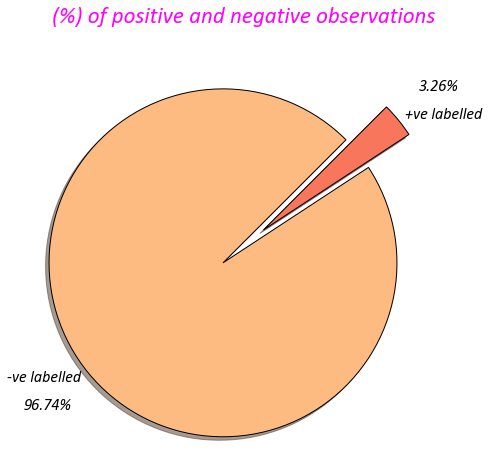

In [47]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(8,8))
    plt.pie(x=[count[0],count[1]],
            autopct=lambda pct : "{:.2f}%".format(pct),
            colors=sns.color_palette('magma_r'),
            shadow=True,
            labels=['-ve labelled','+ve labelled'],
            explode=[0.15,0.15],
            startangle = 45, 
            wedgeprops = customize_plots(plt_cust_prop='wedge'), 
            textprops = customize_plots(plt_cust_prop='txt'),
            pctdistance=1.3,
            labeldistance=1.05)
    plt.title('(%) of positive and negative observations',fontdict=customize_plots(plt_cust_prop='title'),loc='center')

#### **So, there is a serious problem of data imbalance in this dataset. Approximately 3% of patients are the positive ones.**

#### **Question-2: What is the bifurcation of positive patients among pre-cancerous and cancerous conditions?**

In [48]:
tot_dx_pos_ptnts = cer_cancer_df[cer_cancer_df['Updt_Dx']==1].shape[0]
hpv_dx_pos_ptnts = cer_cancer_df[(cer_cancer_df['Updt_Dx']==1) & (cer_cancer_df['Dx:HPV']==1)].shape[0]
cin_dx_pos_ptnts = cer_cancer_df[(cer_cancer_df['Updt_Dx']==1) & (cer_cancer_df['Dx:CIN']==1)].shape[0]
cancer_dx_pos_ptnts = cer_cancer_df[(cer_cancer_df['Updt_Dx']==1) & (cer_cancer_df['Dx:Cancer']==1)].shape[0]

pos_ptnts_details = pd.DataFrame({'+ve patients':[tot_dx_pos_ptnts],
              '+ve patients with HPV':[hpv_dx_pos_ptnts],
              '+ve patients with CIN':[cin_dx_pos_ptnts],
              '+ve patients with Cancer':[cancer_dx_pos_ptnts]})

In [49]:
pos_ptnts_details

,+ve patients,+ve patients with HPV,+ve patients with CIN,+ve patients with Cancer
0,28,17,9,18


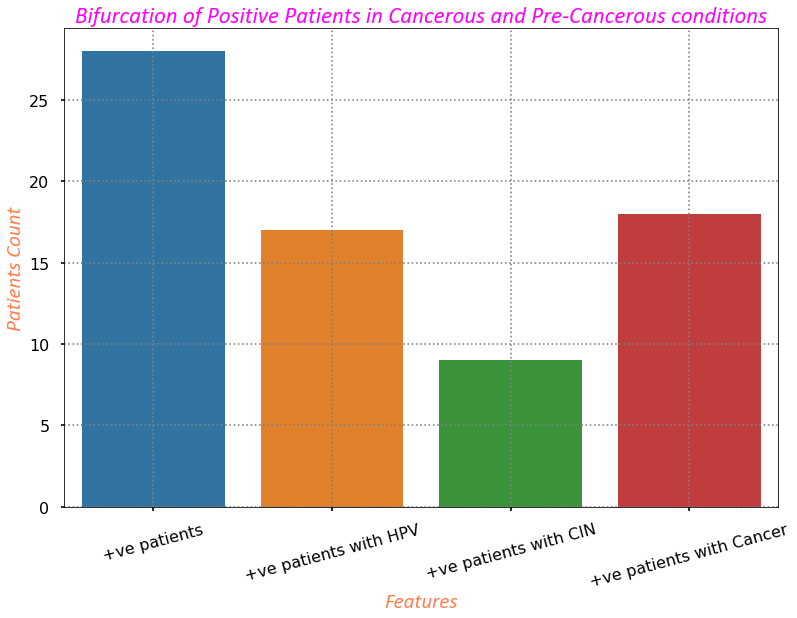

In [50]:
with plt.style.context('seaborn-poster'):
    sns.barplot(data=pos_ptnts_details)
    plt.xlabel('Features',fontdict=customize_plots(plt_cust_prop='label'))
    plt.ylabel('Patients Count',fontdict=customize_plots(plt_cust_prop='label'))
    plt.title('Bifurcation of Positive Patients in Cancerous and Pre-Cancerous conditions',
              fontdict=customize_plots(plt_cust_prop='title'))
    plt.xticks(rotation=15)
    plt.grid(which='major',color='gray',linestyle=':')
    plt.show()

#### **The above graph tells us that HPV is quite popular among majority number of positive cases. And, only 9 patients were seen with abnormal growth cells in the cervix i.e. CIN.**

#### **Question-3: How many patients suffering from HPV developed the CIN or Cancer?**

In [51]:
hpv_pos_dxpos_ptnts_cin_neg_count = cer_cancer_df[(cer_cancer_df['Dx:HPV'] == 1) & (cer_cancer_df['Updt_Dx']==1) &\
                                                  (cer_cancer_df['Dx:CIN']==0)].shape[0]

hpv_pos_dxpos_ptnts_cin_pos_count = cer_cancer_df[(cer_cancer_df['Dx:HPV'] == 1) & (cer_cancer_df['Updt_Dx']==1) &\
                                                  (cer_cancer_df['Dx:CIN']==1)].shape[0]

hpv_pos_dxneg_ptnts_cin_neg_count = cer_cancer_df[(cer_cancer_df['Dx:HPV'] == 1) & (cer_cancer_df['Updt_Dx']==0) &\
                                                 (cer_cancer_df['Dx:CIN']==0)].shape[0]

hpv_pos_dxneg_ptnts_cin_pos_count = cer_cancer_df[(cer_cancer_df['Dx:HPV'] == 1) & (cer_cancer_df['Updt_Dx']==0) &\
                                                 (cer_cancer_df['Dx:CIN']==1)].shape[0]

In [52]:
hpv_cin_relation = pd.DataFrame({'HPV':[1,1],'Dx':[1,0],
             'CIN_positive':[hpv_pos_dxpos_ptnts_cin_pos_count,hpv_pos_dxneg_ptnts_cin_pos_count],
             'CIN_negative':[hpv_pos_dxpos_ptnts_cin_neg_count,hpv_pos_dxneg_ptnts_cin_neg_count]})

hpv_cin_relation

,HPV,Dx,CIN_positive,CIN_negative
0,1,1,0,17
1,1,0,0,1


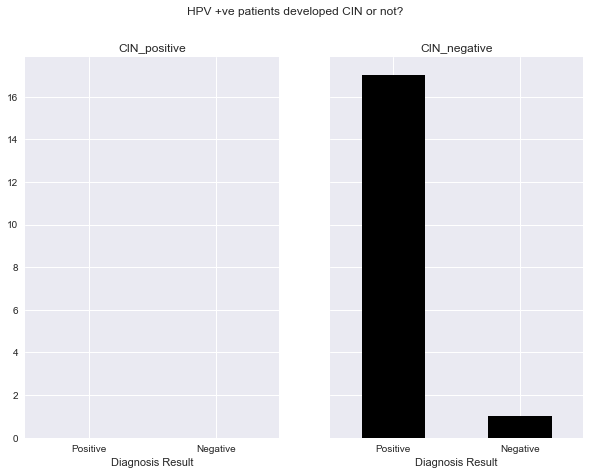

In [53]:
with plt.style.context('seaborn'):
    hpv_cin_relation[['CIN_positive','CIN_negative']].plot(kind='bar',subplots=True,colormap='cubehelix_r',
                                                           sharex=True,sharey=True,layout=(1,2),legend=False,
                                                           xlabel="Diagnosis Result",title="HPV +ve patients developed CIN or not?",
                                                           xticks=hpv_cin_relation.index,rot=0,figsize=(10,7))
    plt.xticks(ticks=[0,1],labels=['Positive','Negative'])
    plt.show()

#### **Above plot tells us that none of the HPV positive patients showed the pre-cancerous(CIN) signs but 1 such patient overall tested negatively.** 
### ***`That means these 17 positively diagnosed patients had the abnormal growth of cells in the cervix(caused by HPV) and they might have delayed their testing which leads to the conversion of abnormal benign cells into malignant. One patient who is HPV +ve, CIN -ve and overall -ve tells us that as of now he is only suffering from Human Papilloma Virus which can in some time result in the abnormal growth of cells in cervix that can potentially turns into cancer if not treated well.`***

#### **Question-4: How many patients suffering from HPV developed the Cancer?**

In [54]:
hpvpos_dxpos_cinpos_ptnts_cc_pos_count = cer_cancer_df[(cer_cancer_df['Dx:HPV'] == 1) & (cer_cancer_df['Updt_Dx']==1) &\
                                                  (cer_cancer_df['Dx:CIN']==1) & (cer_cancer_df['Dx:Cancer']==1)].shape[0]

hpvpos_dxpos_cinpos_ptnts_cc_neg_count = cer_cancer_df[(cer_cancer_df['Dx:HPV'] == 1) & (cer_cancer_df['Updt_Dx']==1) &\
                                                  (cer_cancer_df['Dx:CIN']==1) & (cer_cancer_df['Dx:Cancer']==0)].shape[0]

hpvpos_dxpos_cinneg_ptnts_cc_pos_count = cer_cancer_df[(cer_cancer_df['Dx:HPV'] == 1) & (cer_cancer_df['Updt_Dx']==1) &\
                                                  (cer_cancer_df['Dx:CIN']==0) & (cer_cancer_df['Dx:Cancer']==1)].shape[0]

hpvpos_dxpos_cinneg_ptnts_cc_neg_count = cer_cancer_df[(cer_cancer_df['Dx:HPV'] == 1) & (cer_cancer_df['Updt_Dx']==1) &\
                                                  (cer_cancer_df['Dx:CIN']==0) & (cer_cancer_df['Dx:Cancer']==0)].shape[0]

In [55]:
hpvpos_dxpos_cinpos_ptnts_cc_pos_count, hpvpos_dxpos_cinpos_ptnts_cc_neg_count,\
hpvpos_dxpos_cinneg_ptnts_cc_pos_count,hpvpos_dxpos_cinneg_ptnts_cc_neg_count

(0, 0, 16, 1)

In [56]:
hpv_cin_cc_relation = pd.DataFrame({'HPV':[1,1],'Dx':[1,1],'CIN':[1,0],
             'CC_positive':[hpvpos_dxpos_cinpos_ptnts_cc_pos_count,hpvpos_dxpos_cinneg_ptnts_cc_pos_count],
             'CC_negative':[hpvpos_dxpos_cinpos_ptnts_cc_neg_count,hpvpos_dxpos_cinneg_ptnts_cc_neg_count]})

hpv_cin_cc_relation

,HPV,Dx,CIN,CC_positive,CC_negative
0,1,1,1,0,0
1,1,1,0,16,1


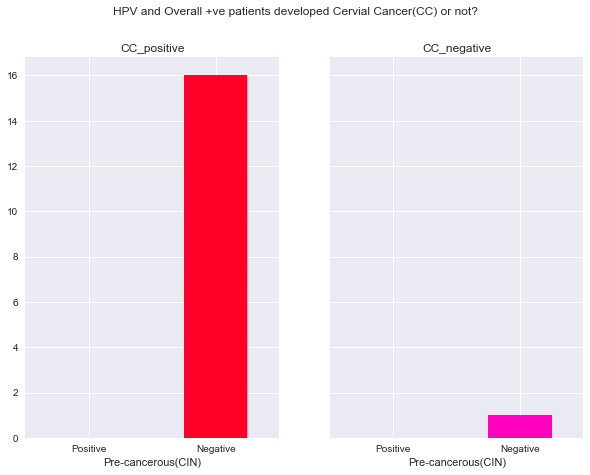

In [57]:
with plt.style.context('seaborn'):
    hpv_cin_cc_relation[['CC_positive','CC_negative']].plot(kind='bar',subplots=True,colormap='gist_rainbow',
                                                           sharex=True,sharey=True,layout=(1,2),legend=False,
                                                           xlabel="Pre-cancerous(CIN)",title="HPV and Overall +ve patients developed Cervial Cancer(CC) or not?",
                                                           xticks=hpv_cin_relation.index,rot=0,figsize=(10,7))
    plt.xticks(ticks=[0,1],labels=['Positive','Negative'])
    plt.show()

### ***`There is one good finding here, one patient who is HPV +ve, Overall diagnosed +ve but negative with CIN and CC. This means patient is suffering from some other type of cancer caused by HPV.`***

##### **Cancers linked to HPV infection:** [Refer link](https://www.cancer.org/cancer/cancer-causes/infectious-agents/hpv/hpv-and-cancer-info.html)
- *Cervical cancer*
- *Vaginal cancer*
- *Penile cancer*
- *Anal cancer*
- *Mouth and throat cancer*

#### **One more thing this bar chart tells us that out of 17 patients which we found above as HPV +ve and CIN -ve 16 were end up with cervical cancer.**

#### **Question-5: Does higher number of sexual partners increase the risk of Cancer?**

In [58]:
ptnts_partners = pd.DataFrame(cer_cancer_df['Number of sexual partners'].value_counts()).reset_index().\
rename(columns={'index':'Sexual Partners','Number of sexual partners':'Patients'})

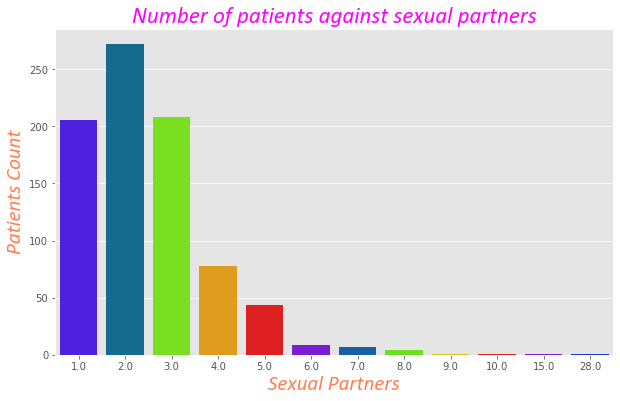

In [59]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10,6))
    sns.barplot(data=ptnts_partners,y='Patients',x='Sexual Partners',orient='vertical',palette='prism')
    plt.ylabel('Patients Count',fontdict=customize_plots(plt_cust_prop='label'))
    plt.xlabel('Sexual Partners',fontdict=customize_plots(plt_cust_prop='label'))
    plt.title('Number of patients against sexual partners',fontdict=customize_plots(plt_cust_prop='title'))

In [60]:
num_sex_partners_effect = cer_cancer_df.groupby(['Number of sexual partners','Dx:HPV'])[['Age']].count().reset_index().\
rename(columns={'Number of sexual partners':'Sexual Partners','Dx:HPV':'HPV Diagnosis Result','Age':'Patients Count'})

num_sex_partners_effect['HPV Diagnosis Result'] = num_sex_partners_effect['HPV Diagnosis Result'].apply(lambda val: 'Negative' if val == 0 else 'Positive')

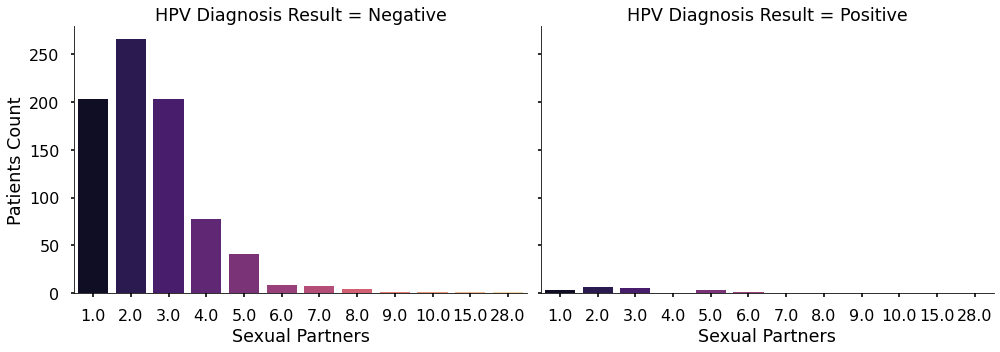

In [61]:
with plt.style.context('seaborn-poster'):
    sns.catplot(x='Sexual Partners',y='Patients Count',col='HPV Diagnosis Result',data=num_sex_partners_effect,
                kind='bar',orient='v',aspect=1.4,palette='magma')

In [62]:
num_sex_partners_cin_effect = cer_cancer_df.groupby(['Number of sexual partners','Dx:CIN'])[['Age']].count().reset_index().\
rename(columns={'Number of sexual partners':'Sexual Partners','Dx:CIN':'CIN Diagnosis Result','Age':'Patients Count'})

num_sex_partners_cin_effect['CIN Diagnosis Result'] = num_sex_partners_cin_effect['CIN Diagnosis Result'].apply(lambda val: 'Negative' if val == 0 else 'Positive')

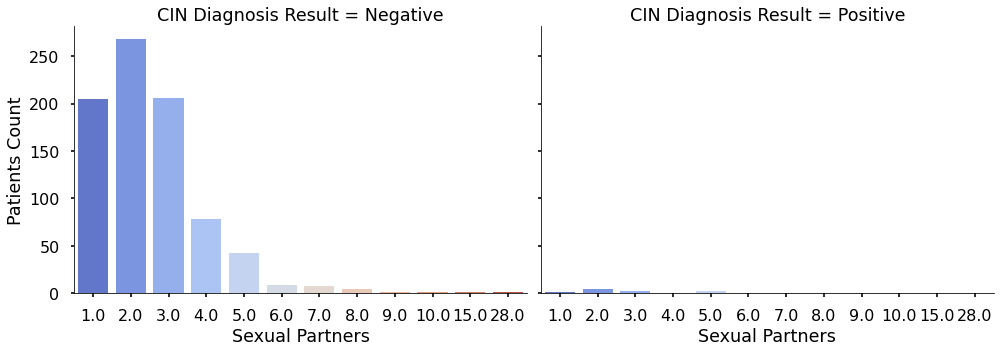

In [63]:
with plt.style.context('seaborn-poster'):
    sns.catplot(x='Sexual Partners',y='Patients Count',col='CIN Diagnosis Result',data=num_sex_partners_cin_effect,
                kind='bar',orient='v',aspect=1.4,palette='coolwarm')

In [64]:
num_sex_partners_cc_effect = cer_cancer_df.groupby(['Number of sexual partners','Dx:Cancer'])[['Age']].count().reset_index().\
rename(columns={'Number of sexual partners':'Sexual Partners','Dx:Cancer':'Cervial Cancer Diagnosis Result','Age':'Patients Count'})

num_sex_partners_cc_effect['Cervial Cancer Diagnosis Result'] = num_sex_partners_cc_effect['Cervial Cancer Diagnosis Result'].apply(lambda val: 'Negative' if val == 0 else 'Positive')

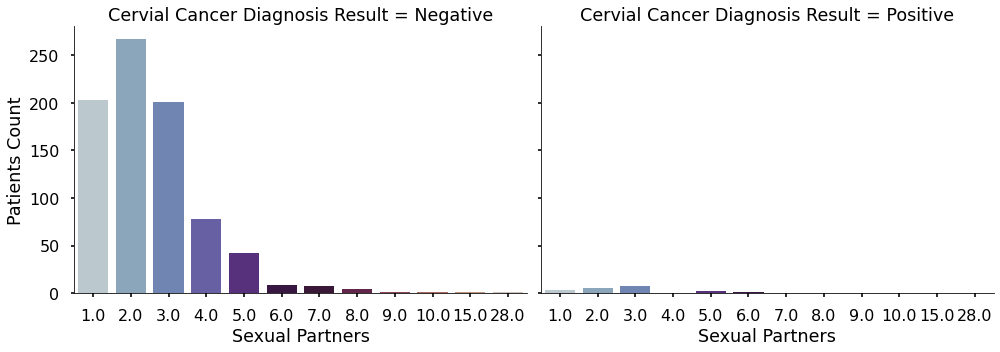

In [65]:
with plt.style.context('seaborn-poster'):
    sns.catplot(x='Sexual Partners',y='Patients Count',col='Cervial Cancer Diagnosis Result',data=num_sex_partners_cc_effect,
                kind='bar',orient='v',aspect=1.4,palette='twilight')

#### **So, based on this dataset we really cannot say that higher number of sexual partners increases the risk of cancer. But, here we also need to remember that we have highly imbalanced data, hence, we just cannot rule out the effect of sexual partners in developing cancer.** 

#### **Question-6: Does higher number of pregnancies & sexual partners increase the risk of cancer?**

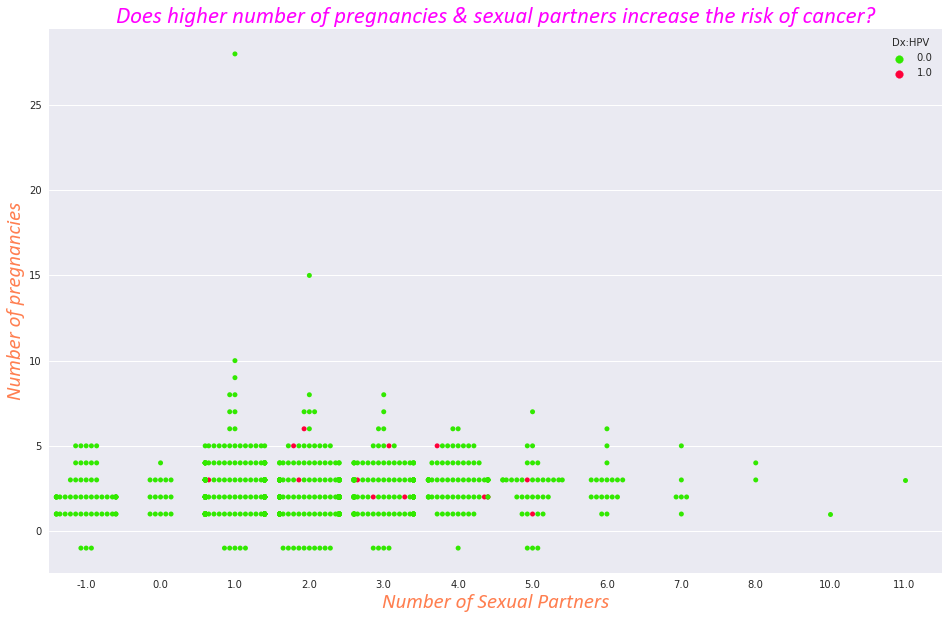

In [66]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,10))
    sns.swarmplot(y='Number of sexual partners', x='Num of pregnancies',hue='Dx:HPV',
              data=cer_cancer_df[['Number of sexual partners','Num of pregnancies','Dx:HPV']].fillna(-1),palette='prism')
    plt.xlabel("Number of Sexual Partners",fontdict=customize_plots(plt_cust_prop='label'))
    plt.ylabel("Number of pregnancies",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does higher number of pregnancies & sexual partners increase the risk of cancer?",fontdict=customize_plots(plt_cust_prop='title'))

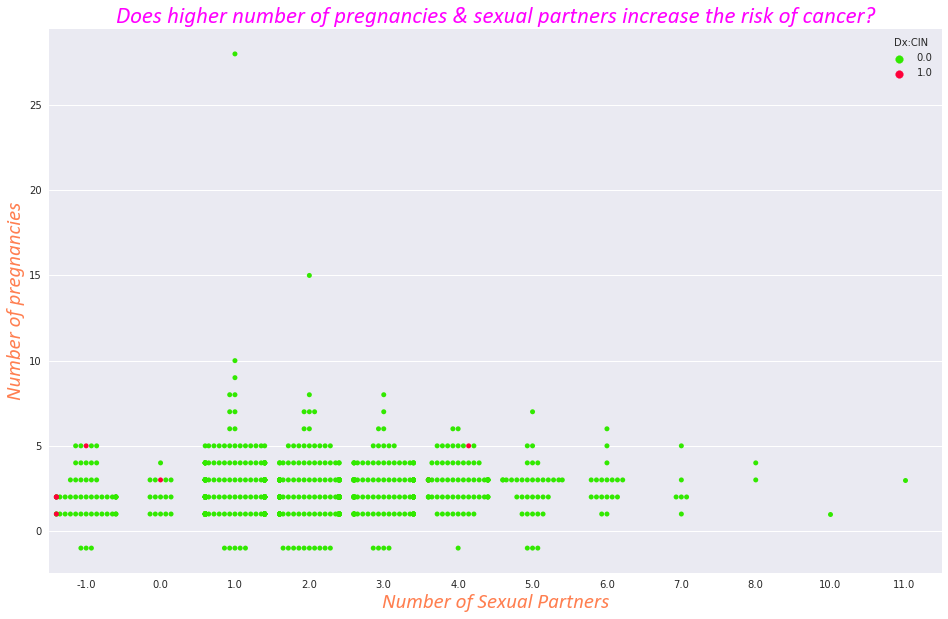

In [67]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,10))
    sns.swarmplot(y='Number of sexual partners', x='Num of pregnancies',hue='Dx:CIN',
              data=cer_cancer_df[['Number of sexual partners','Num of pregnancies','Dx:CIN']].fillna(-1),palette='prism')
    plt.xlabel("Number of Sexual Partners",fontdict=customize_plots(plt_cust_prop='label'))
    plt.ylabel("Number of pregnancies",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does higher number of pregnancies & sexual partners increase the risk of cancer?",fontdict=customize_plots(plt_cust_prop='title'))

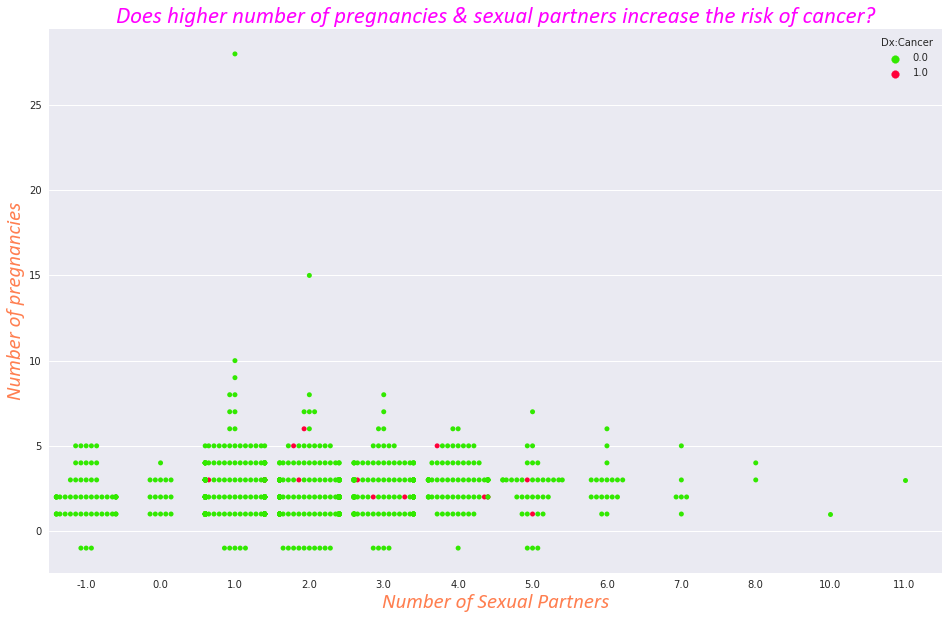

In [68]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,10))
    sns.swarmplot(y='Number of sexual partners', x='Num of pregnancies',hue='Dx:Cancer',
              data=cer_cancer_df[['Number of sexual partners','Num of pregnancies','Dx:Cancer']].fillna(-1),palette='prism')
    plt.xlabel("Number of Sexual Partners",fontdict=customize_plots(plt_cust_prop='label'))
    plt.ylabel("Number of pregnancies",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does higher number of pregnancies & sexual partners increase the risk of cancer?",fontdict=customize_plots(plt_cust_prop='title'))

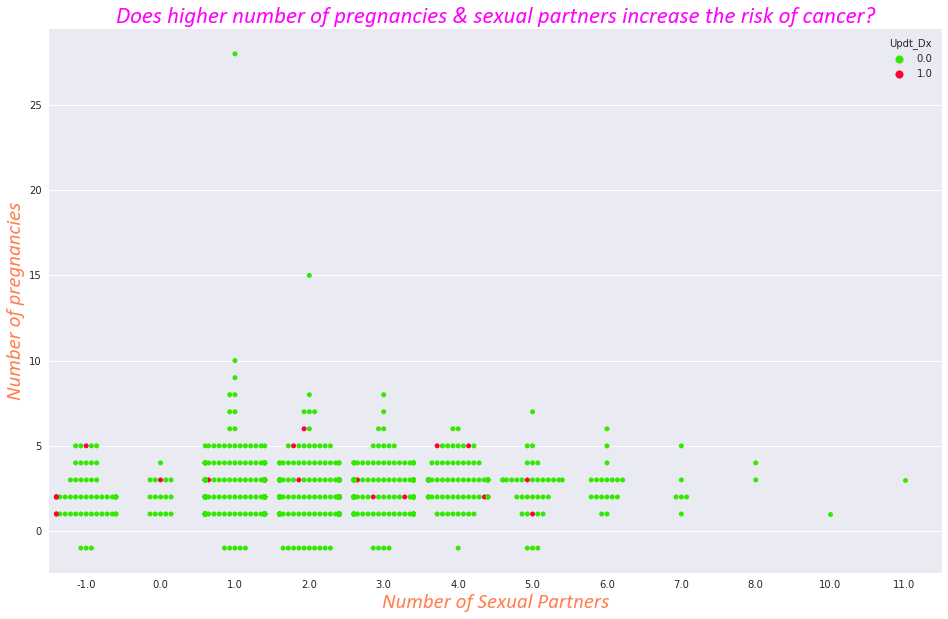

In [69]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,10))
    sns.swarmplot(y='Number of sexual partners', x='Num of pregnancies',hue='Updt_Dx',
              data=cer_cancer_df[['Number of sexual partners','Num of pregnancies','Updt_Dx']].fillna(-1),palette='prism')
    plt.xlabel("Number of Sexual Partners",fontdict=customize_plots(plt_cust_prop='label'))
    plt.ylabel("Number of pregnancies",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does higher number of pregnancies & sexual partners increase the risk of cancer?",fontdict=customize_plots(plt_cust_prop='title'))

#### **This is the problem while working with an highly imbalance data as by seeing the above plots we cannot come on a conclusion that higher number of pregnancies and sexual partners increases the risk of cancer.**

#### **Question-7: Does early first sexual intercourse increases the risk of cancer wth the age?**

In [70]:
cer_cancer_df['Age'] = cer_cancer_df['Age'].astype(int)

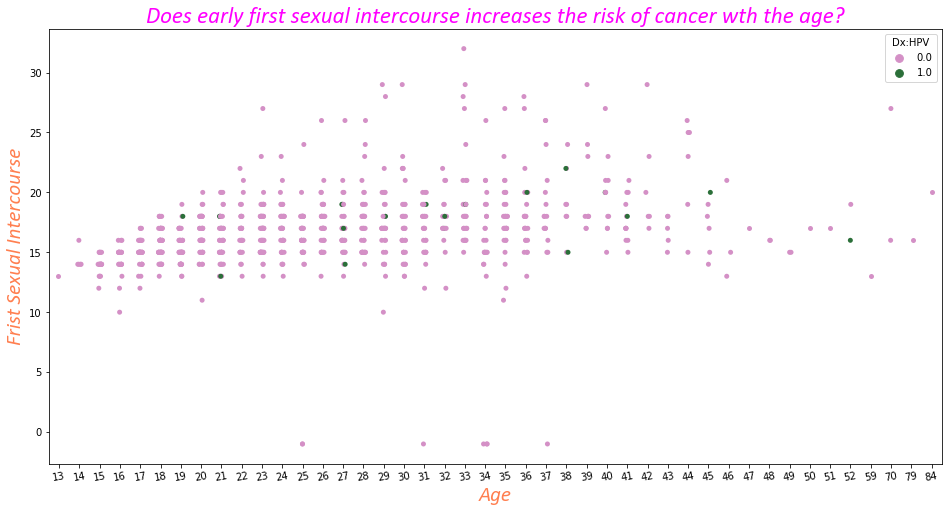

In [71]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(16,8))
    sns.stripplot(data=cer_cancer_df[['Age','First sexual intercourse','Dx:HPV']].fillna(-1),
                  x='Age',y='First sexual intercourse',hue='Dx:HPV',palette='cubehelix_r')
    plt.xticks(size=10,rotation=10)
    plt.ylabel("Frist Sexual Intercourse",fontdict=customize_plots(plt_cust_prop='label'))
    plt.xlabel("Age",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does early first sexual intercourse increases the risk of cancer wth the age?",fontdict=customize_plots(plt_cust_prop='title'))

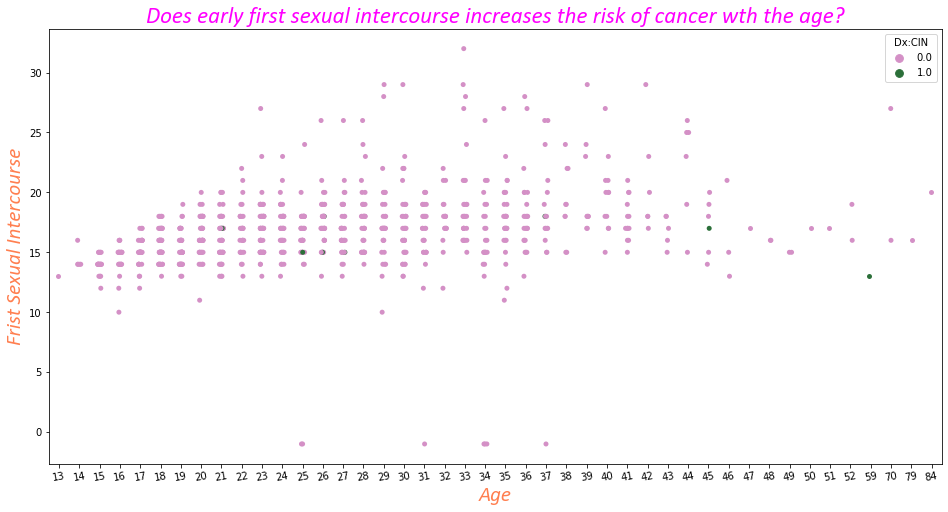

In [72]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(16,8))
    sns.stripplot(data=cer_cancer_df[['Age','First sexual intercourse','Dx:CIN']].fillna(-1),
                  x='Age',y='First sexual intercourse',hue='Dx:CIN',palette='cubehelix_r')
    plt.xticks(size=10,rotation=10)
    plt.ylabel("Frist Sexual Intercourse",fontdict=customize_plots(plt_cust_prop='label'))
    plt.xlabel("Age",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does early first sexual intercourse increases the risk of cancer wth the age?",fontdict=customize_plots(plt_cust_prop='title'))

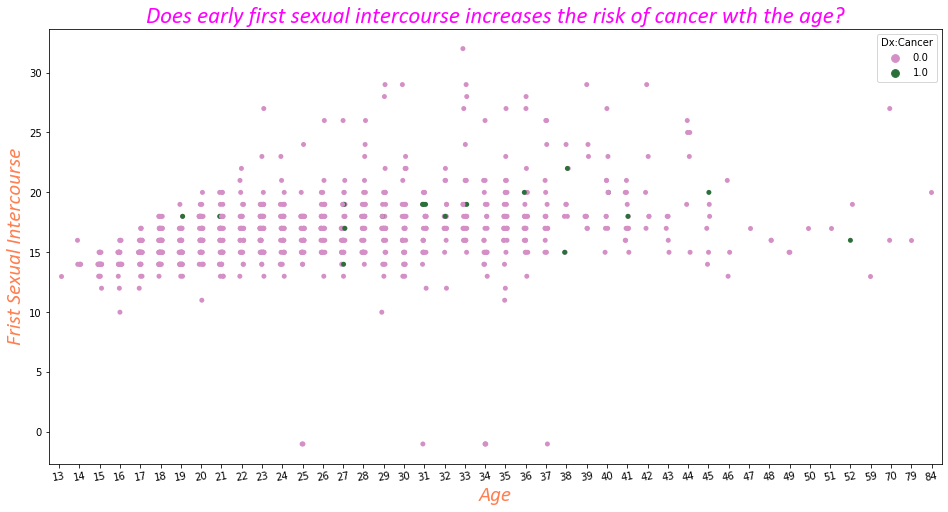

In [73]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(16,8))
    sns.stripplot(data=cer_cancer_df[['Age','First sexual intercourse','Dx:Cancer']].fillna(-1),
                  x='Age',y='First sexual intercourse',hue='Dx:Cancer',palette='cubehelix_r')
    plt.xticks(size=10,rotation=10)
    plt.ylabel("Frist Sexual Intercourse",fontdict=customize_plots(plt_cust_prop='label'))
    plt.xlabel("Age",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does early first sexual intercourse increases the risk of cancer wth the age?",fontdict=customize_plots(plt_cust_prop='title'))

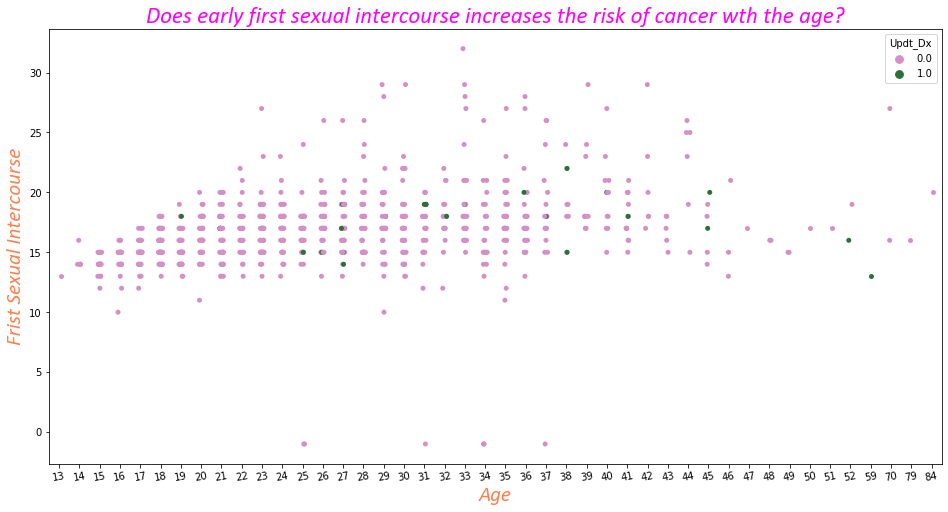

In [74]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(16,8))
    sns.stripplot(data=cer_cancer_df[['Age','First sexual intercourse','Updt_Dx']].fillna(-1),
                  x='Age',y='First sexual intercourse',hue='Updt_Dx',palette='cubehelix_r')
    plt.xticks(size=10,rotation=10)
    plt.ylabel("Frist Sexual Intercourse",fontdict=customize_plots(plt_cust_prop='label'))
    plt.xlabel("Age",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does early first sexual intercourse increases the risk of cancer wth the age?",fontdict=customize_plots(plt_cust_prop='title'))

#### **Not much of an information provided by the above plots as these two features together alone can't really say anyting about the risk of cancer, however, one common finding here is that patients who had their first sexual intercourse after an age of 22 are on a lesser risk of developing cancer in future.**

#### **Question-8: Does higher number of pregnancies and early first sexual intercourse increases the risk of cancer?**

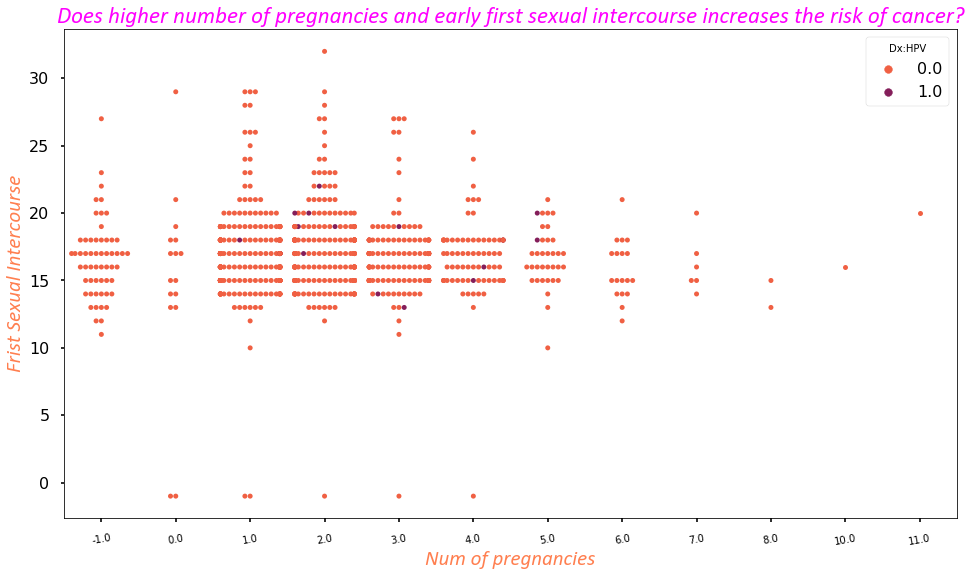

In [75]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(16,9))
    sns.swarmplot(data=cer_cancer_df[['Num of pregnancies','First sexual intercourse','Dx:HPV']].fillna(-1),
                  x='Num of pregnancies',y='First sexual intercourse',hue='Dx:HPV',palette='rocket_r')
    plt.xticks(size=10,rotation=10)
    plt.ylabel("Frist Sexual Intercourse",fontdict=customize_plots(plt_cust_prop='label'))
    plt.xlabel("Num of pregnancies",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does higher number of pregnancies and early first sexual intercourse increases the risk of cancer?",fontdict=customize_plots(plt_cust_prop='title'))

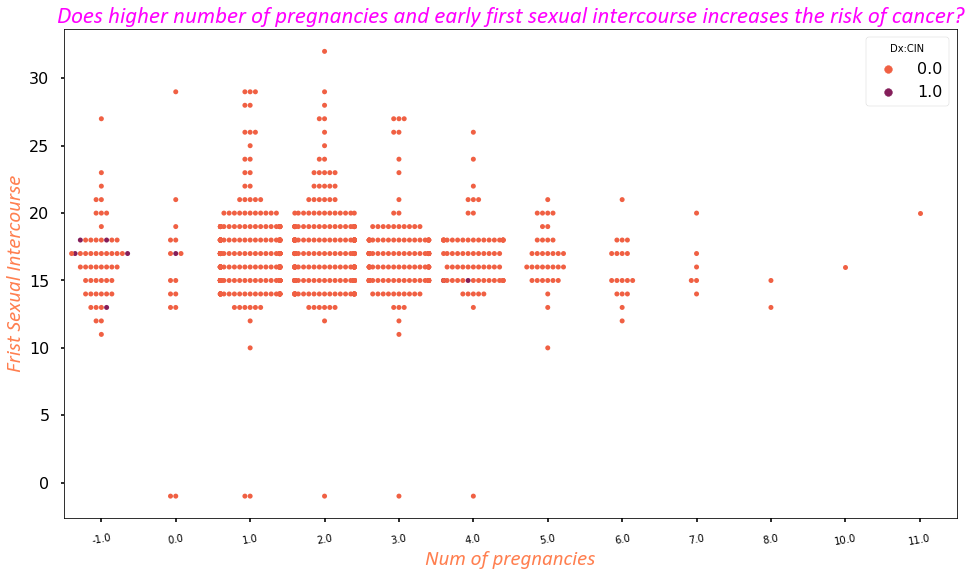

In [76]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(16,9))
    sns.swarmplot(data=cer_cancer_df[['Num of pregnancies','First sexual intercourse','Dx:CIN']].fillna(-1),
                  x='Num of pregnancies',y='First sexual intercourse',hue='Dx:CIN',palette='rocket_r')
    plt.xticks(size=10,rotation=10)
    plt.ylabel("Frist Sexual Intercourse",fontdict=customize_plots(plt_cust_prop='label'))
    plt.xlabel("Num of pregnancies",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does higher number of pregnancies and early first sexual intercourse increases the risk of cancer?",fontdict=customize_plots(plt_cust_prop='title'))

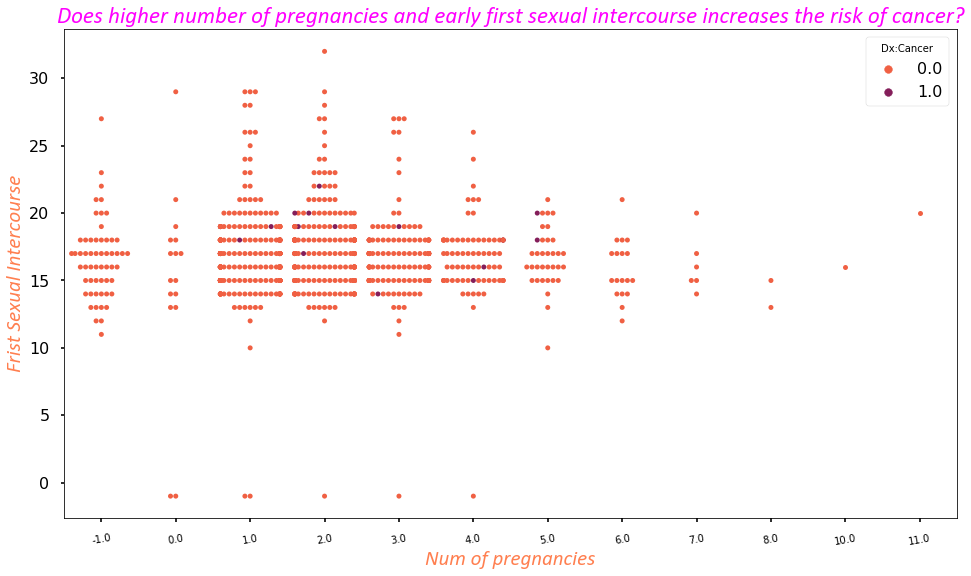

In [77]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(16,9))
    sns.swarmplot(data=cer_cancer_df[['Num of pregnancies','First sexual intercourse','Dx:Cancer']].fillna(-1),
                  x='Num of pregnancies',y='First sexual intercourse',hue='Dx:Cancer',palette='rocket_r')
    plt.xticks(size=10,rotation=10)
    plt.ylabel("Frist Sexual Intercourse",fontdict=customize_plots(plt_cust_prop='label'))
    plt.xlabel("Num of pregnancies",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does higher number of pregnancies and early first sexual intercourse increases the risk of cancer?",fontdict=customize_plots(plt_cust_prop='title'))

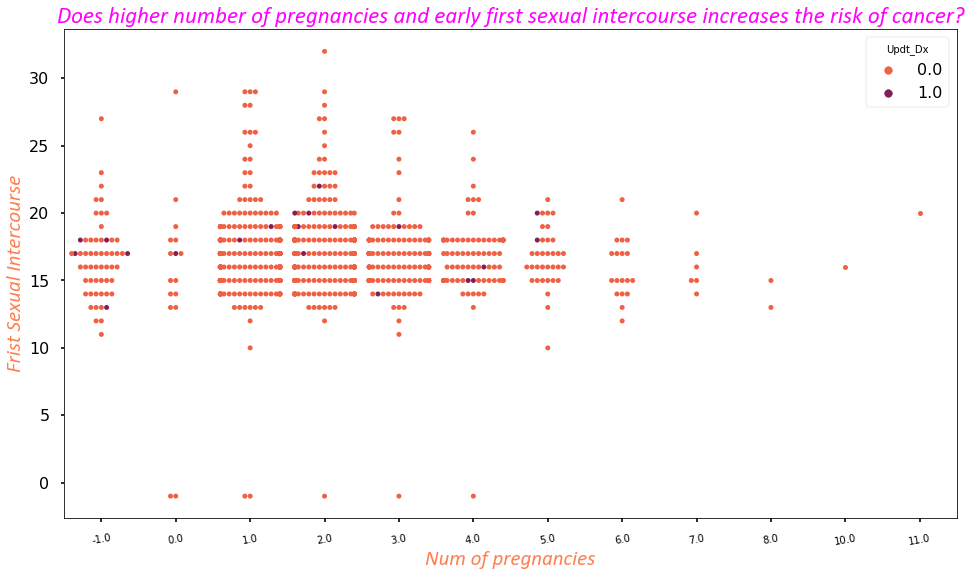

In [78]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(16,9))
    sns.swarmplot(data=cer_cancer_df[['Num of pregnancies','First sexual intercourse','Updt_Dx']].fillna(-1),
                  x='Num of pregnancies',y='First sexual intercourse',hue='Updt_Dx',palette='rocket_r')
    plt.xticks(size=10,rotation=10)
    plt.ylabel("Frist Sexual Intercourse",fontdict=customize_plots(plt_cust_prop='label'))
    plt.xlabel("Num of pregnancies",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does higher number of pregnancies and early first sexual intercourse increases the risk of cancer?",fontdict=customize_plots(plt_cust_prop='title'))

#### **This is the problem while working with an highly imbalance data as by seeing the above cannot come on a conclusion that very high number of pregnancies and early first sexual intercourse increases the risk of cancer. However, there is one point to note that patients who didn't shared their pregnancy numbers have quite a few positive cases.**

#### **Question-9: Does longer consumption of Hormonal Contraceptives (years) with an increasing age enhances the risk of cancer?**

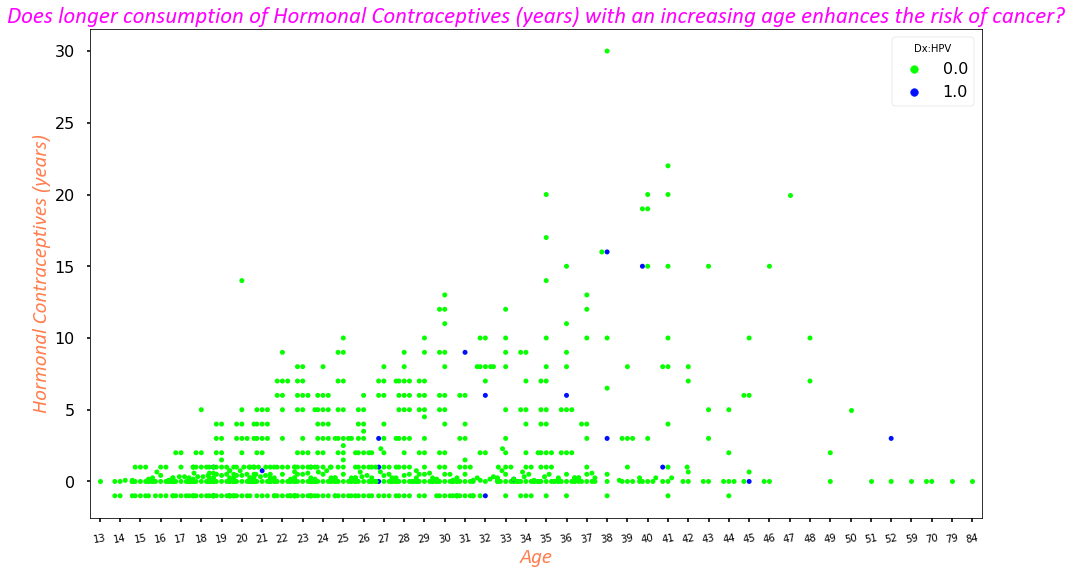

In [79]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(16,9))
    sns.swarmplot(data=cer_cancer_df[['Age','Hormonal Contraceptives (years)','Dx:HPV']].fillna(-1),
                  x='Age',y='Hormonal Contraceptives (years)',hue='Dx:HPV',palette='hsv')
    plt.xticks(size=10,rotation=10)
    plt.ylabel("Hormonal Contraceptives (years)",fontdict=customize_plots(plt_cust_prop='label'))
    plt.xlabel("Age",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does longer consumption of Hormonal Contraceptives (years) with an increasing age enhances the risk of cancer?",
              fontdict=customize_plots(plt_cust_prop='title'))

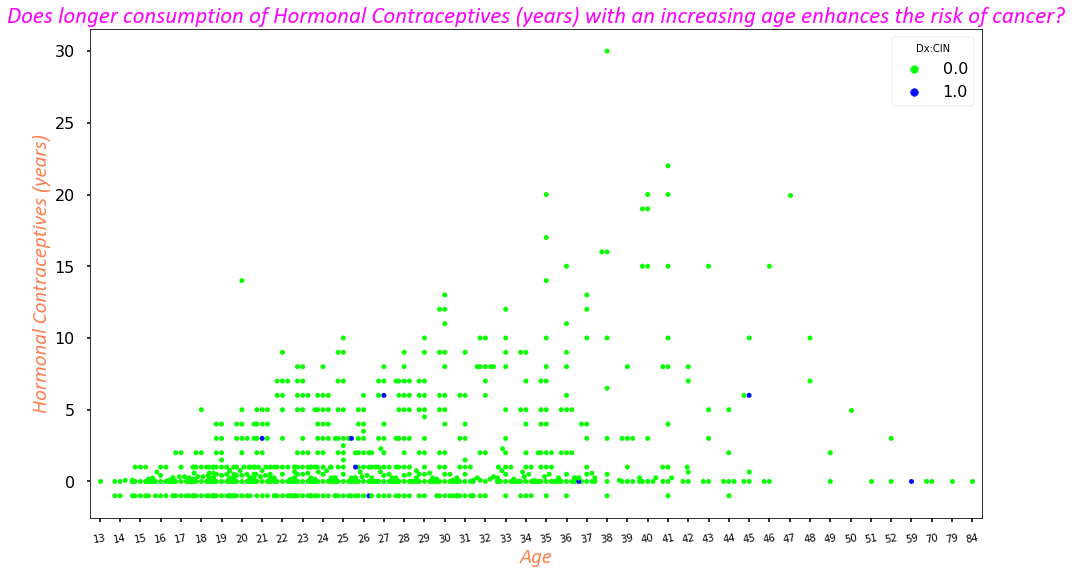

In [80]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(16,9))
    sns.swarmplot(data=cer_cancer_df[['Age','Hormonal Contraceptives (years)','Dx:CIN']].fillna(-1),
                  x='Age',y='Hormonal Contraceptives (years)',hue='Dx:CIN',palette='hsv')
    plt.xticks(size=10,rotation=10)
    plt.ylabel("Hormonal Contraceptives (years)",fontdict=customize_plots(plt_cust_prop='label'))
    plt.xlabel("Age",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does longer consumption of Hormonal Contraceptives (years) with an increasing age enhances the risk of cancer?",
              fontdict=customize_plots(plt_cust_prop='title'))

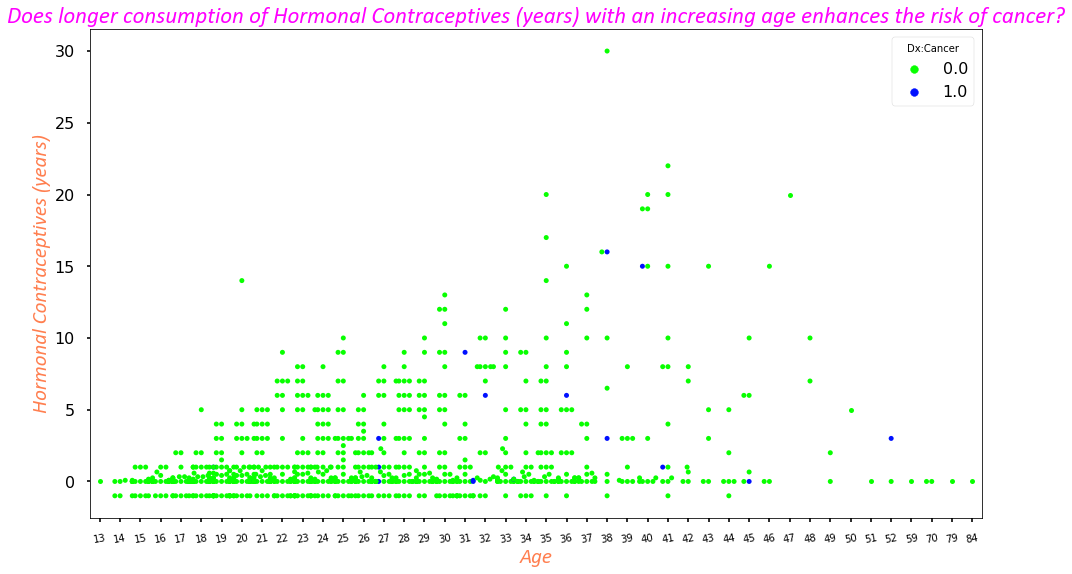

In [81]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(16,9))
    sns.swarmplot(data=cer_cancer_df[['Age','Hormonal Contraceptives (years)','Dx:Cancer']].fillna(-1),
                  x='Age',y='Hormonal Contraceptives (years)',hue='Dx:Cancer',palette='hsv')
    plt.xticks(size=10,rotation=10)
    plt.ylabel("Hormonal Contraceptives (years)",fontdict=customize_plots(plt_cust_prop='label'))
    plt.xlabel("Age",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does longer consumption of Hormonal Contraceptives (years) with an increasing age enhances the risk of cancer?",
              fontdict=customize_plots(plt_cust_prop='title'))

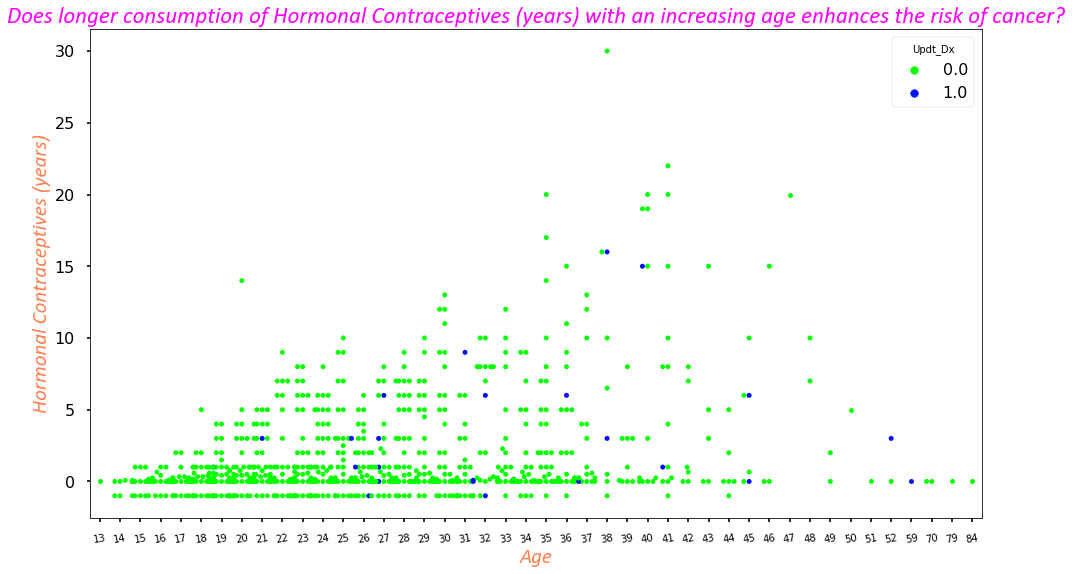

In [82]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(16,9))
    sns.swarmplot(data=cer_cancer_df[['Age','Hormonal Contraceptives (years)','Updt_Dx']].fillna(-1),
                  x='Age',y='Hormonal Contraceptives (years)',hue='Updt_Dx',palette='hsv')
    plt.xticks(size=10,rotation=10)
    plt.ylabel("Hormonal Contraceptives (years)",fontdict=customize_plots(plt_cust_prop='label'))
    plt.xlabel("Age",fontdict=customize_plots(plt_cust_prop='label'))
    plt.title("Does longer consumption of Hormonal Contraceptives (years) with an increasing age enhances the risk of cancer?",
              fontdict=customize_plots(plt_cust_prop='title'))

#### **The above plots hints us that the consumption of Hormonal Contraceptives specially at a higher age increases the risk of cancer.**

#### **Question-10: Does consumption of Hormonal Contraceptives (years) with the habit of smoking enhances the risk of cancer?**

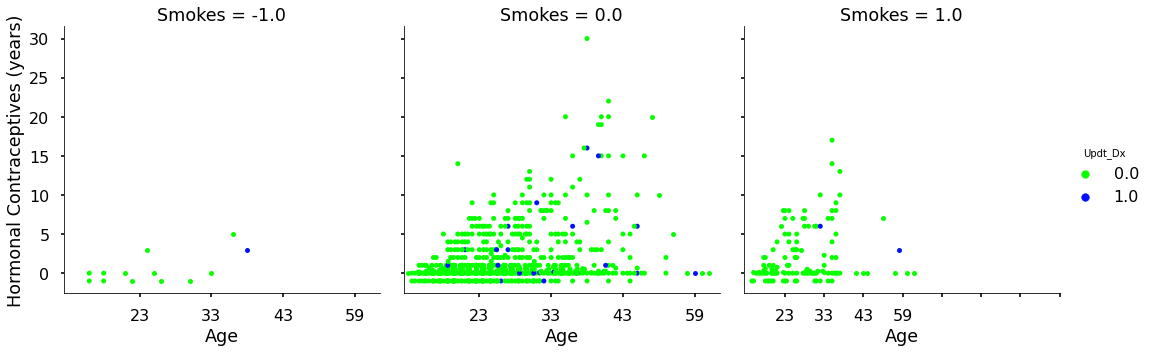

In [83]:
with plt.style.context('seaborn-poster'):
    sns.catplot(data=cer_cancer_df[['Age','Hormonal Contraceptives (years)','Smokes','Updt_Dx']].fillna(-1),
                  x='Age',y='Hormonal Contraceptives (years)',hue='Updt_Dx',col='Smokes',palette='hsv',orient='v',kind='swarm')
    plt.xticks(np.arange(10, 90, 10))

#### **Medically speaking women who smoke are four times more likely to develop cervical cancer. But, the above plot tells us that the habit along with the comsumption HCs is not playing an imperative part in increasing the risk of cancer.**

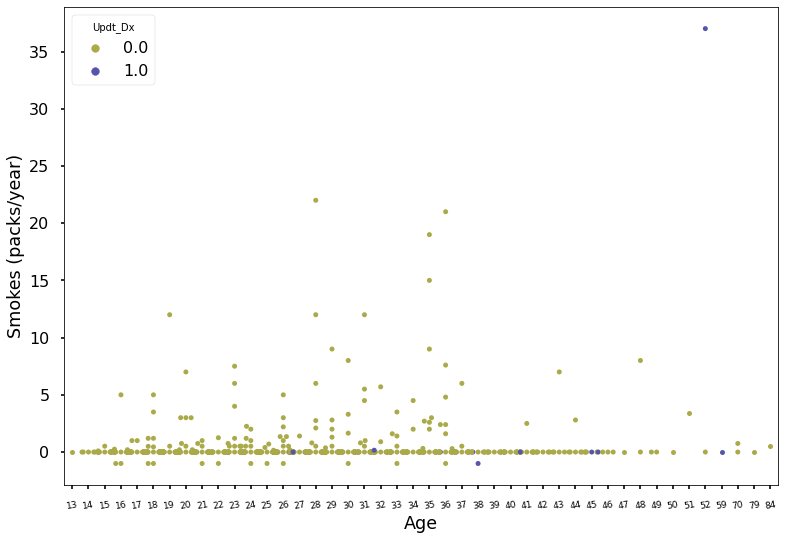

In [84]:
with plt.style.context('seaborn-poster'):
    sns.swarmplot(data=cer_cancer_df[['Age','Smokes (packs/year)','Updt_Dx']].fillna(-1),
                  x='Age',y='Smokes (packs/year)',hue='Updt_Dx',palette='gist_stern_r')
    plt.xticks(rotation=10,size=9)

#### **Smoking at a higher age does suggesting us the increasing risk of cancer.** 

#### **Question-11: Are there any positive cases among IUD using ones?**

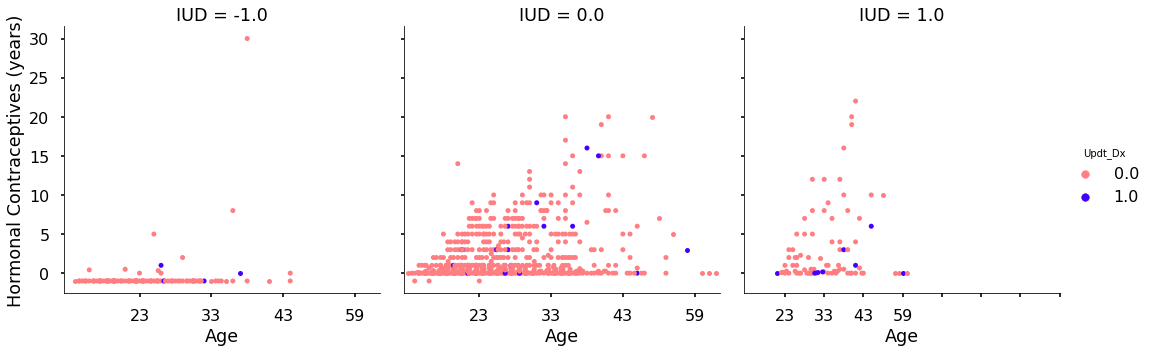

In [85]:
with plt.style.context('seaborn-poster'):
    sns.catplot(data=cer_cancer_df[['Age','Hormonal Contraceptives (years)','IUD','Updt_Dx']].fillna(-1),
                  x='Age',y='Hormonal Contraceptives (years)',hue='Updt_Dx',col='IUD',palette='gnuplot2_r',orient='v',kind='swarm')
    plt.xticks(np.arange(10, 90, 10))

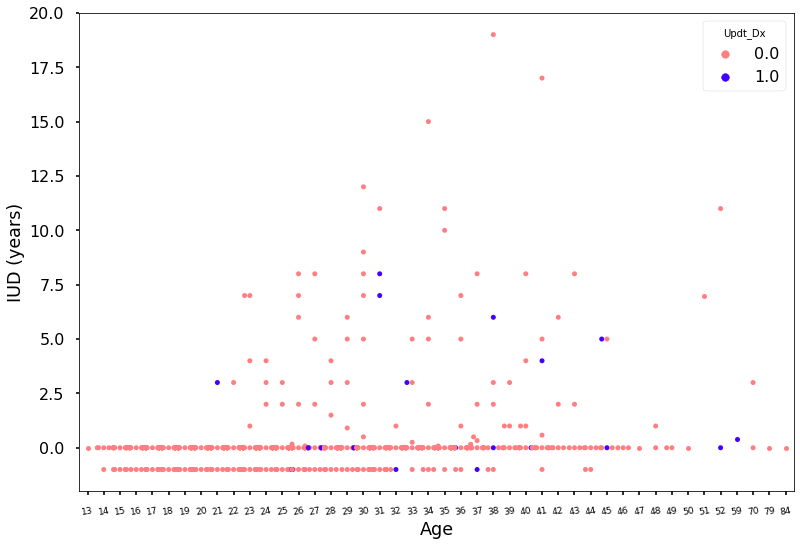

In [86]:
with plt.style.context('seaborn-poster'):
    sns.swarmplot(data=cer_cancer_df[['Age','IUD (years)','Updt_Dx']].fillna(-1),
                  x='Age',y='IUD (years)',hue='Updt_Dx',palette='gnuplot2_r')
    plt.xticks(rotation=10,size=9)

#### **Medically speaking using IUD's reduces the risk of cancer upto some extent. Here, in the above plots we have witnessed some positive cases even when patients were using IUD from a longer time.** [Refer Link](https://www.roswellpark.org/cancertalk/201802/can-intrauterine-device-iud-reduce-cervical-cancer-risk)

#### **Question-12: Which STD has often occured in the cancer positive cases?**

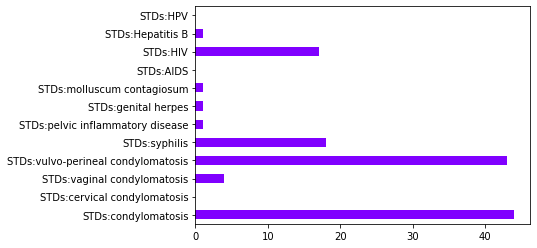

In [87]:
cer_cancer_df[cer_cancer_df['Updt_Dx']==0][['STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B','STDs:HPV']].sum().plot(kind='barh',colormap='rainbow');

#### **This plot shows us that infected from STD doesn't really mean that you will develop cancer.**

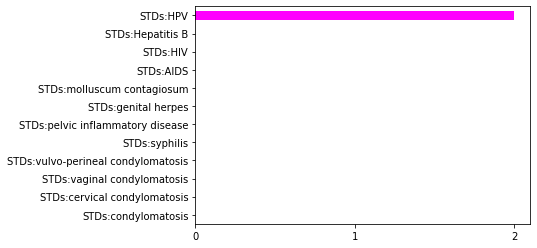

In [88]:
cer_cancer_df[cer_cancer_df['Dx:HPV']==1][['STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B','STDs:HPV']].sum().plot(kind='barh',xticks=(0,1,2),colormap='cool_r');

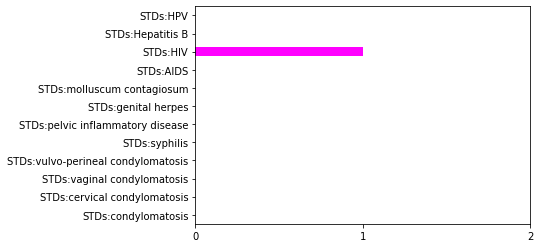

In [89]:
cer_cancer_df[cer_cancer_df['Dx:CIN']==1][['STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B','STDs:HPV']].sum().plot(kind='barh',xticks=(0,1,2),colormap='cool_r');

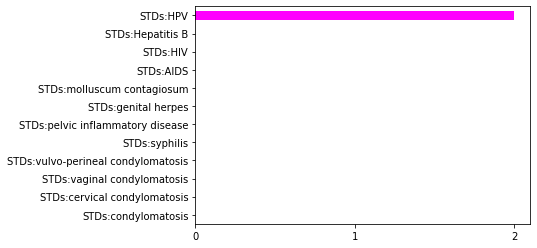

In [90]:
cer_cancer_df[cer_cancer_df['Dx:Cancer']==1][['STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B','STDs:HPV']].sum().plot(kind='barh',xticks=(0,1,2),colormap='cool_r');

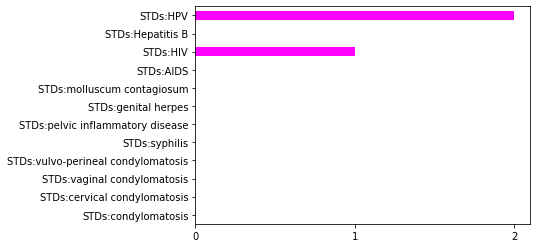

In [91]:
cer_cancer_df[cer_cancer_df['Updt_Dx']==1][['STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B','STDs:HPV']].sum().plot(kind='barh',xticks=(0,1,2),colormap='cool_r');

#### **In the above plots, one thing to note out that patients who were suffering from one of the infections of HPV were also cancer positive. Although the count of such patients is very less but medically speaking not every type of HPV infection can lead to cancer.**

##### *Some types of genital HPV cause warts that vary in size, shape, and number. These viruses rarely lead to cancer. They are known as low-risk HPV. Common types of low-risk HPV include HPV-6 and HPV-11.  About 70% of HPV-related cervical cancer is caused by HPV-16 or HPV-18. However, most genital HPV infections will not cause cancer. Smoking can also raise the risk of cervical cancer in women with HPV.* [Refer Link](https://www.cancer.net/navigating-cancer-care/prevention-and-healthy-living/hpv-and-cancer)

#### **Filling missing values**
- *'Hormonal Contraceptives'*
- *'Hormonal Contraceptives (years)'*
- *'IUD'*
- *'IUD (years)'*
- *'STDs'*
- *'STDs (number)'*
- *'STDs:condylomatosis'*
- *'STDs:cervical condylomatosis'*
- *'STDs:vaginal condylomatosis'*
- *'STDs:vulvo-perineal condylomatosis'*
- *'STDs:syphilis'*
- *'STDs:pelvic inflammatory disease'*
- *'STDs:genital herpes'*
- *'STDs:molluscum contagiosum'*
- *'STDs:AIDS'*
- *'STDs:HIV'*
- *'STDs:Hepatitis B'*
- *'STDs:HPV'*

#### **For the above columns if 'Hormonal Contraceptives','STDs', 'IUD' and their corresponding features containing missing values then they all are imputed as -1.**
- The reason for imputing -1 is that these features are important in terms of prediction thus if patient doesn't provide these details then not even the doctor can tell whether the patient is positive or not in the screening. Hence, I thought this would be best way to make the model learn such kind of data with a different manner.
    - I'm applying this implementation on the entire dataset then will create a separate TRAIN and TEST splits. This will introduce any data leakage as I'm filling an all together different value irrespective of the dataset. And, this has be to be implemented in the both the sets.

In [200]:
qq = pd.read_csv("Datasets/Cervical_Cancer/kag_risk_factors_cervical_cancer.csv").rename(columns={'Citology':'Cytology'})
qq[qq['Hinselmann']==1]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Cytology,Biopsy
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
23,40,1.0,20.0,2.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,1,1,0,1
57,33,3.0,21.0,6.0,1.0,7.0,1.6,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,0
58,35,2.0,18.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,1,0
96,35,5.0,11.0,?,1.0,15.0,15.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,1,1
131,30,?,13.0,3.0,1.0,22.0,3.3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3.0,3.0,0,0,0,0,1,1,0,1
152,26,3.0,19.0,2.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,1,0
185,28,2.0,17.0,?,0.0,0.0,0.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
191,29,3.0,14.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,0.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,0
203,28,2.0,19.0,2.0,0.0,0.0,0.0,1.0,0.42,1.0,3.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.0,7.0,0,0,0,0,1,1,0,1


In [3]:
cer_cancer_df = pd.read_csv("Datasets/Cervical_Cancer/kag_risk_factors_cervical_cancer.csv").rename(columns={'Citology':'Cytology'})

In [4]:
cer_cancer_df.isin(['?']).sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [5]:
std_cols = ['STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis',
            'STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum', 
            'STDs:AIDS','STDs:HIV','STDs:Hepatitis B', 'STDs:HPV','Hormonal Contraceptives','Hormonal Contraceptives (years)',
            'IUD','IUD (years)','STDs']

In [6]:
len(std_cols)

17

In [7]:
impute_std_hc_iud(df=cer_cancer_df,cols=std_cols)

In [8]:
cer_cancer_df.isin(['?']).sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives                13
Hormonal Contraceptives (years)        13
IUD                                    22
IUD (years)                            22
STDs                                   10
STDs (number)                         105
STDs:condylomatosis                    10
STDs:cervical condylomatosis           10
STDs:vaginal condylomatosis            10
STDs:vulvo-perineal condylomatosis     10
STDs:syphilis                          10
STDs:pelvic inflammatory disease       10
STDs:genital herpes                    10
STDs:molluscum contagiosum             10
STDs:AIDS                              10
STDs:HIV                               10
STDs:Hepatitis B                  

In [9]:
cer_cancer_df['Updt_Dx'] = cer_cancer_df[['Dx:Cancer','Dx']].apply(lambda row: 1 if row['Dx:Cancer'] == 1 and row['Dx'] == 0 else row['Dx'],\
                                                                   axis=1)

cer_cancer_df = cer_cancer_df.applymap(lambda val: np.NaN if val == '?' else np.float(val))

### **`Handling Multi-Class Labelling`**
- Here, there can be a possibility that a patient has underwent multiple tests. Thus, labelling the target feature as a medical test which is having the highest probability among as compared to other tests.*

In [10]:
tgt_keytoval_dict = {1:np.round((cer_cancer_df['Hinselmann'].value_counts()/cer_cancer_df.shape[0])[1],2),
2:np.round((cer_cancer_df['Schiller'].value_counts()/cer_cancer_df.shape[0])[1],2),
3:np.round((cer_cancer_df['Cytology'].value_counts()/cer_cancer_df.shape[0])[1],2),
4:np.round((cer_cancer_df['Biopsy'].value_counts()/cer_cancer_df.shape[0])[1],2)}

tgt_keytoval_dict

{1: 0.04, 2: 0.09, 3: 0.05, 4: 0.06}

In [13]:
tgt_valtokey_dict = dict((v,k) for k,v in tgt_keytoval_dict.items())
tgt_valtokey_dict

{0.04: 1, 0.09: 2, 0.05: 3, 0.06: 4}

In [14]:
cer_cancer_df['Hinselmann']=cer_cancer_df['Hinselmann'].apply(lambda val : tgt_keytoval_dict[1] if val ==1 else val)
cer_cancer_df['Schiller']=cer_cancer_df['Schiller'].apply(lambda val : tgt_keytoval_dict[2] if val ==1 else val)
cer_cancer_df['Cytology']=cer_cancer_df['Cytology'].apply(lambda val : tgt_keytoval_dict[3] if val ==1 else val)
cer_cancer_df['Biopsy']=cer_cancer_df['Biopsy'].apply(lambda val : tgt_keytoval_dict[4] if val ==1 else val)

In [15]:
cer_cancer_df['multi_tgt_prob']=cer_cancer_df[['Hinselmann', 'Schiller', 'Cytology','Biopsy']].apply(lambda row:max(row['Hinselmann'],\
                                                                                    row['Schiller'],\
                                                                                    row['Cytology'],\
                                                                                    row['Biopsy']),axis=1)

In [16]:
cer_cancer_df['multi_tgt_label'] = cer_cancer_df['multi_tgt_prob'].apply(lambda val: 0 if val ==0 else tgt_valtokey_dict[val])

In [17]:
cer_cancer_df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Cytology', 'Biopsy', 'Updt_Dx', 'multi_tgt_prob', 'multi_tgt_label'],
      dtype='object')

In [18]:
cer_cancer_df.drop(['STDs: Number of diagnosis','STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
                    'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx','Hinselmann', 'Schiller', 'Cytology', 'Biopsy','multi_tgt_prob'],
                   axis=1,inplace=True)

### ***Problem Statement: Whether a patient should undergo any medical examination or not?***

In [19]:
cer_cancer_df['multi_tgt_label'].value_counts()

0    756
2     74
3     20
4      7
1      1
Name: multi_tgt_label, dtype: int64

In [20]:
X = cer_cancer_df[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV','multi_tgt_label']].copy(deep=True)

X.shape

(858, 26)

In [21]:
y = cer_cancer_df[['Updt_Dx']].copy(deep=True)

y.shape

(858, 1)

#### **Separating data into TRAIN and TEST sets**

In [22]:
X1, X_test, y1, y_test = train_test_split(X,y,test_size=0.40,stratify=y,random_state=24)

In [23]:
print(X1.shape,y1.shape,X_test.shape,y_test.shape)

(514, 26) (514, 1) (344, 26) (344, 1)


In [24]:
y1.value_counts()

Updt_Dx
0.0        497
1.0         17
dtype: int64

In [25]:
y_test.value_counts()

Updt_Dx
0.0        333
1.0         11
dtype: int64

### **Checking whether TRAIN and TEST are from same distribution**
- *This is an important step because if Train and Test doesn't belongs to the same distribution then it means both the datasets are coming from different populations and are totally separable which is not the right thing.*

##### **Dropping the diagnosis feature from both the sets as this column won't be available in real-time**

In [108]:
# X1 = X1.drop(['Updt_Dx'],axis=1)
# X_test = X_test.drop(['Updt_Dx'],axis=1)

##### **Creating new `train1` and `test1` sets from `TRAIN` and `TEST`**

##### **TRAIN1**

In [109]:
# X1 = X1.applymap(lambda val: np.NaN if val =='?' else np.float(val))

In [26]:
X1.shape

(514, 26)

In [27]:
y1.shape

(514, 1)

In [28]:
train1 = pd.concat([X1.iloc[:,:].reset_index(drop=True).copy(deep=True),y1.iloc[:,:].reset_index(drop=True).copy(deep=True)],axis=1)

In [29]:
train1['target'] = 1   ## Added a new dummy target with value as 1

In [30]:
train1.shape

(514, 28)

In [31]:
train1.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,multi_tgt_label,Updt_Dx,target
0,26.0,4.0,13.0,NaN,0.0,0.0,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
1,27.0,3.0,15.0,4.0,0.0,0.0,0.0,1.0,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1
2,37.0,3.0,20.0,5.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
3,29.0,3.0,17.0,NaN,0.0,0.0,0.0,1.0,4.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
4,24.0,1.0,19.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1


##### **TEST1**

In [116]:
# X_test = X_test.applymap(lambda val: np.NaN if val =='?' else np.float(val))

In [32]:
test1 = pd.concat([X_test.reset_index(drop=True).copy(deep=True),y_test.reset_index(drop=True).copy(deep=True)],axis=1)

In [33]:
test1['target'] = 0

In [34]:
test1.shape

(344, 28)

In [35]:
test1.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,multi_tgt_label,Updt_Dx,target
0,19.0,1.0,17.0,1.0,1.0,7.0,12.0,1.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1,35.0,2.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2,50.0,2.0,17.0,7.0,0.0,0.0,0.0,1.0,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
3,27.0,2.0,19.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
4,23.0,1.0,18.0,5.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


##### **Imputing Missing Values in `train1` and `test1` using KNN Imputer**

In [36]:
knn_imputer = KNNImputer(n_neighbors=7,weights='distance')

In [37]:
train1_missing_removed = pd.DataFrame(knn_imputer.fit_transform(train1),columns=train1.columns)

In [38]:
test1_missing_removed = pd.DataFrame(knn_imputer.fit_transform(test1),columns=test1.columns)

##### **Model training on `train1` and testing on `test1`**

In [39]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=7)

In [40]:
dt_model = dt.fit(train1_missing_removed.iloc[:,0:-1],train1_missing_removed['target'])

In [41]:
knn_model = knn.fit(train1_missing_removed.iloc[:,0:-1],train1_missing_removed['target'])

##### **Decision Tree :: Results**

In [42]:
y_pred = dt_model.predict(test1_missing_removed.iloc[:,0:-1])

In [43]:
accuracy_score(y_pred,y_test), precision_score(y_pred,y_test), recall_score(y_pred,y_test)

(0.03197674418604651, 1.0, 0.03197674418604651)

In [44]:
confusion_matrix(y_pred,y_test)

array([[  0,   0],
       [333,  11]], dtype=int64)

In [45]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

##### **KNN :: Results**

In [46]:
y_pred_knn = knn_model.predict(test1_missing_removed.iloc[:,0:-1])

In [47]:
accuracy_score(y_pred_knn,y_test), precision_score(y_pred_knn,y_test), recall_score(y_pred_knn,y_test)

(0.03197674418604651, 1.0, 0.03197674418604651)

In [48]:
confusion_matrix(y_pred_knn,y_test)

array([[  0,   0],
       [333,  11]], dtype=int64)

In [49]:
y_pred_knn

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

#### **The above results are saying that both TRAIN and TEST sets are entirely similar and not separable. Thus, we are good to go ahead.**

## **`Filling_Missing_Values`**
##### *Here, I'll work on imputing the missing values in TRAIN set.*

In [50]:
nulls_percentage_df = compute_null_percentage(data_df=X1,missing_type=False)

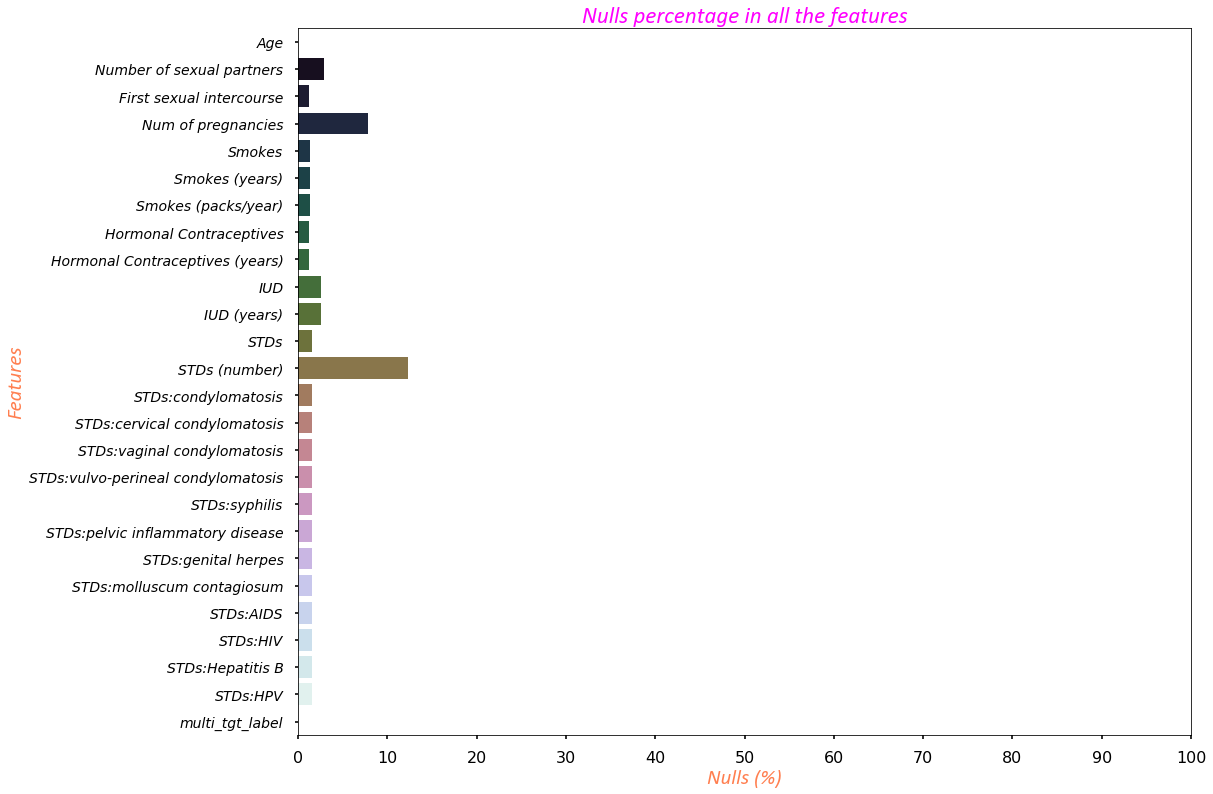

In [51]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(16,13))
    sns.barplot(y='Feature_Name',x='NULL Percentage',data=nulls_percentage_df,palette='cubehelix')
    plt.xlabel('Nulls (%)',fontdict=customize_plots(plt_cust_prop='label'))
    plt.ylabel('Features',fontdict=customize_plots(plt_cust_prop='label'))
    plt.title('Nulls percentage in all the features',fontdict=customize_plots(plt_cust_prop='title'))
    plt.xticks(np.arange(0,101,10))
    plt.yticks(size=14,rotation=0,style='italic',color='k')

In [52]:
X1_train = pd.concat([X1.reset_index(drop=True),y1.reset_index(drop=True)],axis=1)

In [53]:
y1_train = X1_train['multi_tgt_label'].copy(deep=True)

In [54]:
X1_train.drop(['multi_tgt_label'],axis=1,inplace=True)

##### **Imputing `Number of sexual partners`**

In [55]:
X1_sex_partners_mean = np.round(X1_train.groupby(['Updt_Dx'])['Number of sexual partners'].mean(),3).to_dict()
X1_sex_partners_mean

{0.0: 2.529, 1.0: 2.941}

In [56]:
X1_train['Number of sexual partners'] = X1_train[['Updt_Dx','Number of sexual partners']].apply(lambda row: X1_sex_partners_mean[0]\
                                                  if row['Updt_Dx'] == 0 and pd.isnull(row['Number of sexual partners'])\
                                                  else X1_sex_partners_mean[1]\
                                                  if row['Updt_Dx'] == 1 and pd.isnull(row['Number of sexual partners'])\
                                                  else row['Number of sexual partners'],axis=1)

##### **Imputing `First Sexual Intercourse`**

In [57]:
X1_first_intercourse_mean = np.round((X1_train.groupby(['Updt_Dx','Number of sexual partners'])['First sexual intercourse'].mean()),3).to_dict()
X1_first_intercourse_mean

{(0.0, 1.0): 17.647,
 (0.0, 2.0): 17.097,
 (0.0, 2.529): 16.0,
 (0.0, 3.0): 16.837,
 (0.0, 4.0): 16.479,
 (0.0, 5.0): 16.48,
 (0.0, 6.0): 15.333,
 (0.0, 7.0): 14.0,
 (0.0, 8.0): 16.0,
 (0.0, 9.0): nan,
 (0.0, 28.0): 10.0,
 (1.0, 1.0): 19.0,
 (1.0, 2.0): 17.25,
 (1.0, 3.0): 18.667,
 (1.0, 5.0): 16.667,
 (1.0, 6.0): 17.0}

In [58]:
X1_train['First sexual intercourse'] = X1_train[['Updt_Dx','Number of sexual partners','First sexual intercourse']]\
.apply(lambda row: X1_first_intercourse_mean[(0,row['Number of sexual partners'])]\
                                                  if row['Updt_Dx'] == 0 and pd.isnull(row['First sexual intercourse'])\
                                                  else X1_sex_partners_mean[(1,row['Number of sexual partners'])]\
                                                  if row['Updt_Dx'] == 1 and pd.isnull(row['First sexual intercourse'])\
                                                  else row['First sexual intercourse'],axis=1)

##### **Imputing `Smokes (packs/year)`**

In [59]:
X1_smokes_packs_year = X1_train.groupby(['Updt_Dx'])['Smokes (packs/year)'].mean().to_dict()
X1_smokes_packs_year

{0.0: 0.38501267495865577, 1.0: 2.3125}

In [60]:
X1_train['Smokes (packs/year)'] = X1_train[['Updt_Dx','Smokes (packs/year)']].apply(lambda row: X1_smokes_packs_year[row['Updt_Dx']]\
                                                                        if pd.isnull(row['Smokes (packs/year)'])\
                                                                        else row['Smokes (packs/year)'],axis=1)

##### **Imputing `Hormonal Contraceptives (years)`**

In [61]:
X1_HC_year = X1_train[X1_train['Hormonal Contraceptives (years)']!= -1].groupby(['Updt_Dx'])['Hormonal Contraceptives (years)'].mean().to_dict()
X1_HC_year

{0.0: 2.160193137395881, 1.0: 3.5675}

In [62]:
X1_train['Hormonal Contraceptives (years)']=X1_train[['Updt_Dx','Hormonal Contraceptives (years)']].apply(lambda row: X1_HC_year[row['Updt_Dx']]\
                                                                        if pd.isnull(row['Hormonal Contraceptives (years)'])\
                                                                        else row['Hormonal Contraceptives (years)'],axis=1)

##### **Imputing `IUD (years)`**

In [63]:
X1_IUD_year = X1_train[X1_train['IUD (years)']!= -1].groupby(['Updt_Dx'])['IUD (years)'].mean().to_dict()
X1_IUD_year

{0.0: 0.49204176334106725, 1.0: 1.7333333333333334}

In [64]:
X1_train['IUD (years)']=X1_train[['Updt_Dx','IUD (years)']].apply(lambda row: X1_IUD_year[row['Updt_Dx']]\
                                                                        if pd.isnull(row['IUD (years)'])\
                                                                        else row['IUD (years)'],axis=1)

##### **Dropping unwanted columns `'Smokes', 'Smokes (years)','Hormonal Contraceptives' & 'IUD'`**

In [65]:
X1_train.drop(['Smokes', 'Smokes (years)','Hormonal Contraceptives','IUD'],axis=True,inplace=True)

##### **Imputing `STDs :: Features`**

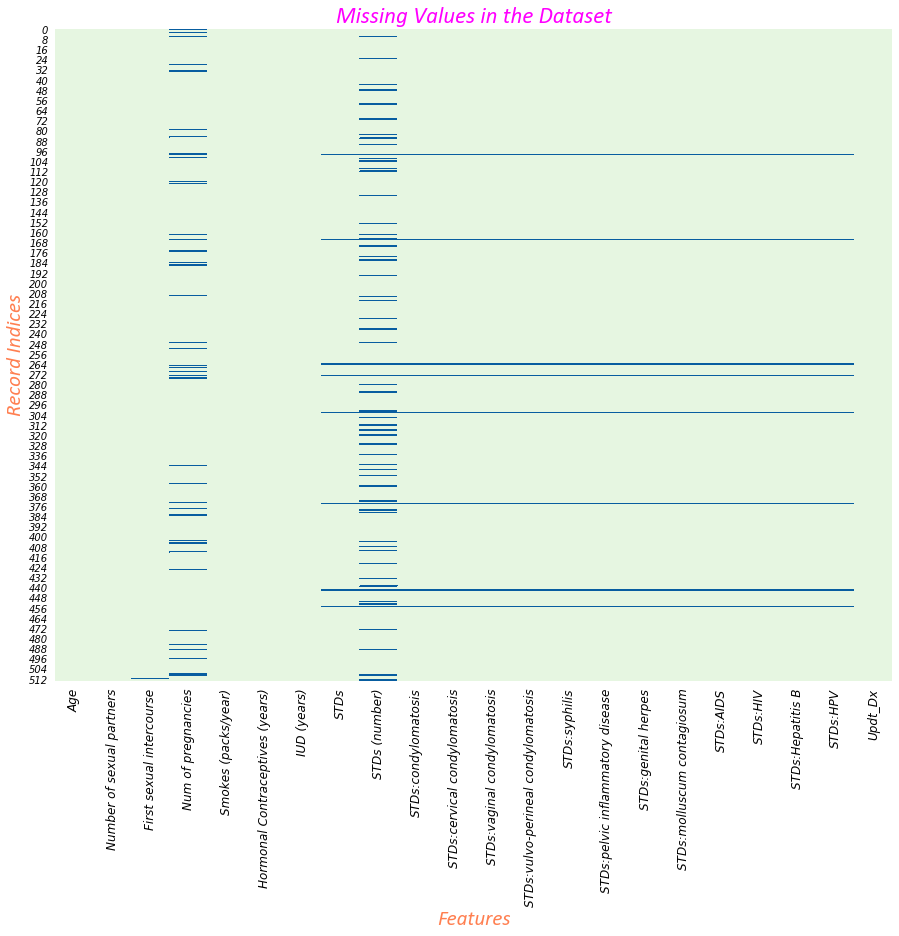

In [66]:
plot_null_values(df=X1_train)

In [67]:
X1_train[X1_train['First sexual intercourse'].isna()]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Updt_Dx
512,31.0,9.0,NaN,1.0,5.5,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
X1_train['First sexual intercourse'].fillna(method='bfill',inplace=True)

In [69]:
X1_train[X1_train['STDs'].isna()]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Updt_Dx
99,16.0,1.0,12.0,NaN,0.0,0.42,0.492042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
166,36.0,2.0,18.0,NaN,7.6,8.00,0.492042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
264,22.0,1.0,14.0,2.0,0.0,7.00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
273,21.0,2.0,19.0,NaN,0.0,0.50,0.492042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
302,38.0,2.0,19.0,5.0,0.0,30.00,0.492042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
374,22.0,2.0,18.0,2.0,0.0,3.00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
442,26.0,2.0,17.0,2.0,0.0,0.00,0.492042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
455,22.0,4.0,16.0,1.0,0.0,0.50,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [70]:
X1_train['STDs'].fillna(value=-1,inplace=True)

X1_stds_c = X1[X1['STDs:condylomatosis']!=-1].groupby(['Updt_Dx'])['STDs:condylomatosis'].mean().to_dict()
X1_stds_cc = X1[X1['STDs:cervical condylomatosis']!=-1].groupby(['Updt_Dx'])['STDs:cervical condylomatosis'].mean().to_dict()
X1_stds_vc = X1[X1['STDs:vaginal condylomatosis']!=-1].groupby(['Updt_Dx'])['STDs:vaginal condylomatosis'].mean().to_dict()
X1_stds_vpc = X1[X1['STDs:vulvo-perineal condylomatosis']!=-1].groupby(['Updt_Dx'])['STDs:vulvo-perineal condylomatosis'].mean().to_dict()
X1_stds_syp = X1[X1['STDs:syphilis']!=-1].groupby(['Updt_Dx'])['STDs:syphilis'].mean().to_dict()
X1_stds_pi = X1[X1['STDs:pelvic inflammatory disease']!=-1].groupby(['Updt_Dx'])['STDs:pelvic inflammatory disease'].mean().to_dict()
X1_stds_gh = X1[X1['STDs:genital herpes']!=-1].groupby(['Updt_Dx'])['STDs:genital herpes'].mean().to_dict()
X1_stds_moc = X1[X1['STDs:molluscum contagiosum']!=-1].groupby(['Updt_Dx'])['STDs:molluscum contagiosum'].mean().to_dict()
X1_stds_aids = X1[X1['STDs:AIDS']!=-1].groupby(['Updt_Dx'])['STDs:AIDS'].mean().to_dict()
X1_stds_hiv = X1[X1['STDs:HIV']!=-1].groupby(['Updt_Dx'])['STDs:HIV'].mean().to_dict()
X1_stds_hepb = X1[X1['STDs:Hepatitis B']!=-1].groupby(['Updt_Dx'])['STDs:Hepatitis B'].mean().to_dict()
X1_stds_hpv = X1[X1['STDs:HPV']!=-1].groupby(['Updt_Dx'])['STDs:HPV'].mean().to_dict()

print(X1_stds_c
,X1_stds_cc
,X1_stds_vc
,X1_stds_vpc
,X1_stds_syp
,X1_stds_pi
,X1_stds_gh
,X1_stds_moc
,X1_stds_aids
,X1_stds_hiv
,X1_stds_hepb
,X1_stds_hpv)

X1['STDs:condylomatosis'] = X1[['Updt_Dx','STDs:condylomatosis']].apply(lambda row: X1_stds_c[row['Updt_Dx']]\
                                                                        if pd.isnull(row['STDs:condylomatosis'])\
                                                                        else row['STDs:condylomatosis'],axis=1)

X1['STDs:cervical condylomatosis'] = X1[['Updt_Dx','STDs:cervical condylomatosis']].apply(lambda row: X1_stds_cc[row['Updt_Dx']]\
                                                                        if pd.isnull(row['STDs:cervical condylomatosis'])\
                                                                        else row['STDs:cervical condylomatosis'],axis=1)

X1['STDs:vaginal condylomatosis'] = X1[['Updt_Dx','STDs:vaginal condylomatosis']].apply(lambda row: X1_stds_vc[row['Updt_Dx']]\
                                                                        if pd.isnull(row['STDs:vaginal condylomatosis'])\
                                                                        else row['STDs:vaginal condylomatosis'],axis=1)

X1['STDs:vulvo-perineal condylomatosis']=X1[['Updt_Dx','STDs:vulvo-perineal condylomatosis']].apply(lambda row: X1_stds_vpc[row['Updt_Dx']]\
                                                                        if pd.isnull(row['STDs:vulvo-perineal condylomatosis'])\
                                                                        else row['STDs:vulvo-perineal condylomatosis'],axis=1)

X1['STDs:syphilis'] = X1[['Updt_Dx','STDs:syphilis']].apply(lambda row: X1_stds_syp[row['Updt_Dx']]\
                                                                        if pd.isnull(row['STDs:syphilis'])\
                                                                        else row['STDs:syphilis'],axis=1)

X1['STDs:pelvic inflammatory disease'] = X1[['Updt_Dx','STDs:pelvic inflammatory disease']].apply(lambda row: X1_stds_pi[row['Updt_Dx']]\
                                                                        if pd.isnull(row['STDs:pelvic inflammatory disease'])\
                                                                        else row['STDs:pelvic inflammatory disease'],axis=1)

X1['STDs:genital herpes'] = X1[['Updt_Dx','STDs:genital herpes']].apply(lambda row: X1_stds_gh[row['Updt_Dx']]\
                                                                        if pd.isnull(row['STDs:genital herpes'])\
                                                                        else row['STDs:genital herpes'],axis=1)

X1['STDs:molluscum contagiosum'] = X1[['Updt_Dx','STDs:molluscum contagiosum']].apply(lambda row: X1_stds_moc[row['Updt_Dx']]\
                                                                        if pd.isnull(row['STDs:molluscum contagiosum'])\
                                                                        else row['STDs:molluscum contagiosum'],axis=1)

X1['STDs:AIDS'] = X1[['Updt_Dx','STDs:AIDS']].apply(lambda row: X1_stds_aids[row['Updt_Dx']]\
                                                                        if pd.isnull(row['STDs:AIDS'])\
                                                                        else row['STDs:AIDS'],axis=1)

X1['STDs:HIV'] = X1[['Updt_Dx','STDs:HIV']].apply(lambda row: X1_stds_hiv[row['Updt_Dx']]\
                                                                        if pd.isnull(row['STDs:HIV'])\
                                                                        else row['STDs:HIV'],axis=1)

X1['STDs:Hepatitis B'] = X1[['Updt_Dx','STDs:Hepatitis B']].apply(lambda row: X1_stds_hepb[row['Updt_Dx']]\
                                                                        if pd.isnull(row['STDs:Hepatitis B'])\
                                                                        else row['STDs:Hepatitis B'],axis=1)

X1['STDs:HPV'] = X1[['Updt_Dx','STDs:HPV']].apply(lambda row: X1_stds_hpv[row['Updt_Dx']]\
                                                                        if pd.isnull(row['STDs:HPV'])\
                                                                        else row['STDs:HPV'],axis=1)

X1['STDs'] = X1[['Updt_Dx','STDs']].apply(lambda row: X1_stds_hpv[row['Updt_Dx']]\
                                                                        if pd.isnull(row['STDs'])\
                                                                        else row['STDs'],axis=1)

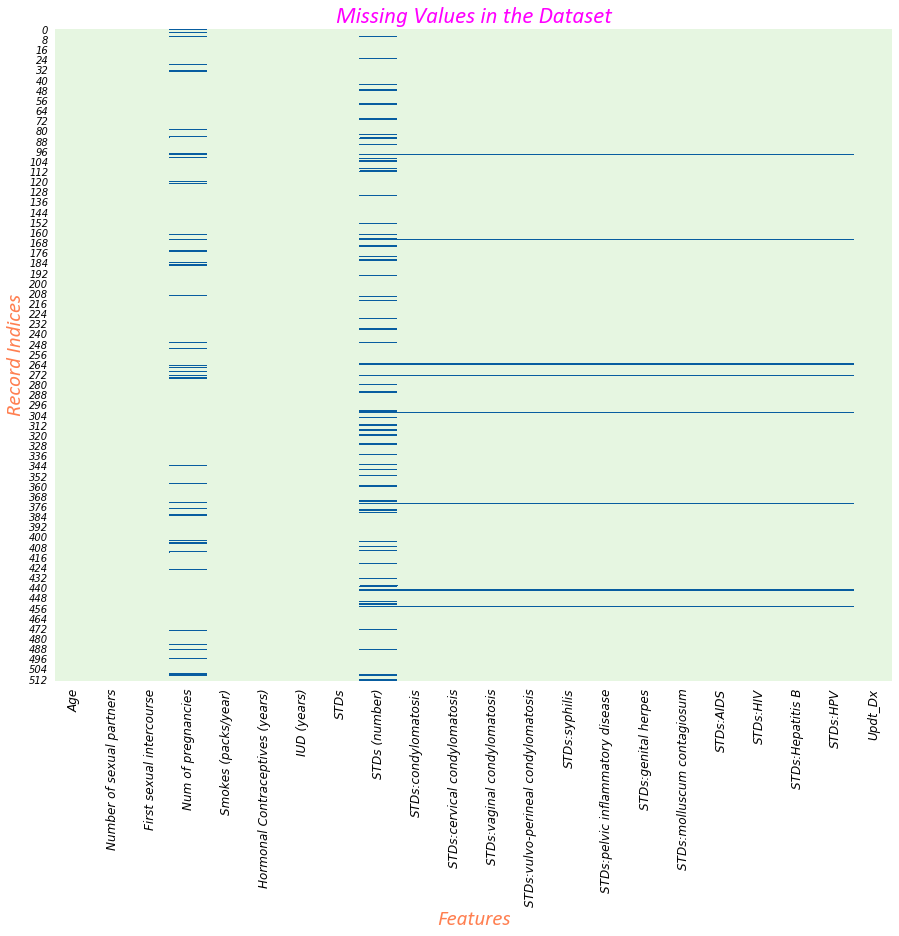

In [71]:
plot_null_values(X1_train)

##### **Dropping unwanted columns `'Smokes', 'Smokes (years)','Hormonal Contraceptives' & 'IUD'`**

In [72]:
X1_train.drop(['STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis','STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV'],axis=True,inplace=True)

In [165]:
# X1.drop(['STDs', 'STDs (number)'],axis=True,inplace=True)

In [73]:
X1_train.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs', 'Updt_Dx'],
      dtype='object')

##### **Imputing `Num of pregnancies`**

In [74]:
pregnancies_test = X1_train[X1_train['Num of pregnancies'].isna()][['Age', 'Number of sexual partners', 'First sexual intercourse',
                                                        'Smokes (packs/year)','Hormonal Contraceptives (years)', 'IUD (years)',
                                                        'STDs', 'Updt_Dx','Num of pregnancies']].copy(deep=True)

In [75]:
pregnancies_train = X1_train[~(X1_train['Num of pregnancies'].isna())][['Age', 'Number of sexual partners', 'First sexual intercourse',
                                                        'Smokes (packs/year)','Hormonal Contraceptives (years)', 'IUD (years)',
                                                        'STDs', 'Updt_Dx','Num of pregnancies']].copy(deep=True)

In [76]:
pregnancies_train.shape,pregnancies_test.shape

((474, 9), (40, 9))

In [77]:
pregnancies_knn = KNeighborsClassifier(n_neighbors=7,weights='distance',algorithm='kd_tree')

In [78]:
pregnancies_knn_model = pregnancies_knn.fit(pregnancies_train.iloc[:,0:-1],pregnancies_train.iloc[:,-1])

In [79]:
pregnancies_knn_model.predict(pregnancies_test.iloc[:,0:-1])

array([3., 2., 1., 1., 3., 1., 1., 1., 1., 1., 5., 2., 1., 3., 1., 3., 1.,
       4., 2., 4., 3., 2., 3., 1., 4., 1., 1., 2., 3., 4., 3., 1., 4., 2.,
       1., 4., 3., 1., 1., 3.])

In [80]:
pregnancies_test['Num of pregnancies'] = pregnancies_knn_model.predict(pregnancies_test.iloc[:,0:-1])

In [81]:
new_X1 = pd.concat([pregnancies_train.reset_index(drop=True),pregnancies_test.reset_index(drop=True)],axis=0)\
[['Age', 'Number of sexual partners', 'First sexual intercourse','Smokes (packs/year)','Hormonal Contraceptives (years)', 'IUD (years)',
'STDs','Num of pregnancies']].copy(deep=True)

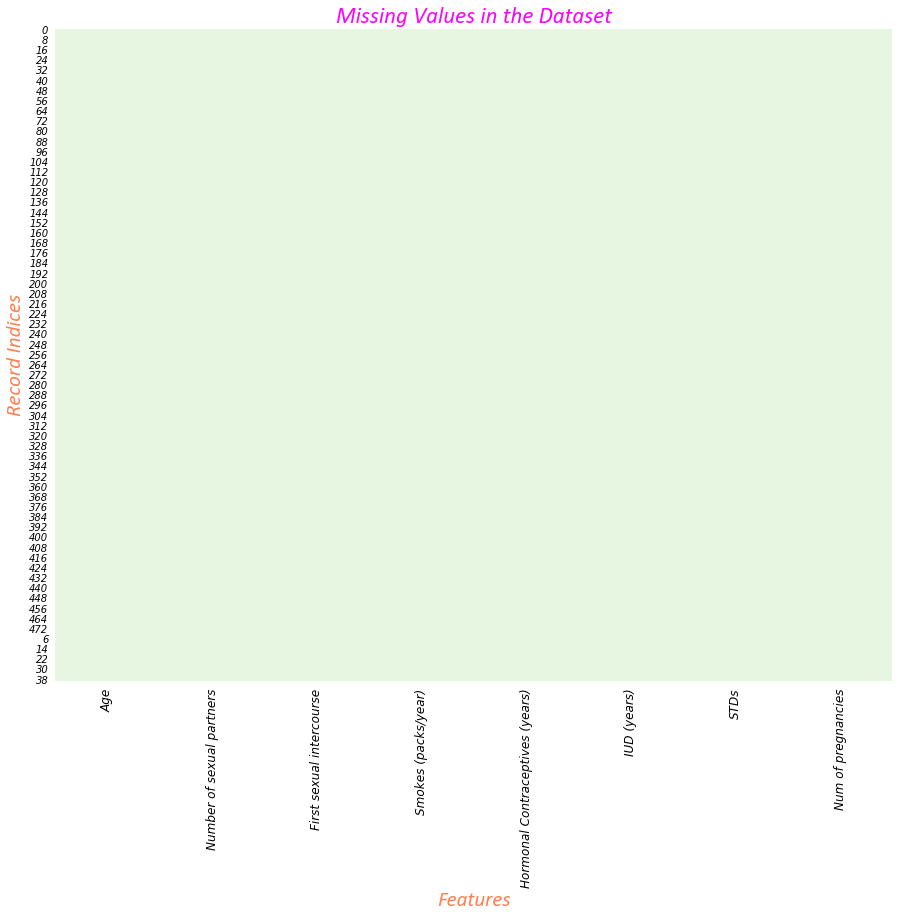

In [82]:
plot_null_values(new_X1)

In [83]:
new_X1.shape

(514, 8)

In [104]:
y1_train.shape

(514,)

In [105]:
y1_train.value_counts()

0    453
2     43
3     12
4      6
Name: multi_tgt_label, dtype: int64

In [107]:
new_X1.reset_index(drop=True,inplace=True)
y1_train.reset_index(drop=True,inplace=True)

In [108]:
new_X1.index, y1_train.index

(RangeIndex(start=0, stop=514, step=1), RangeIndex(start=0, stop=514, step=1))

### **Feature Engineering**

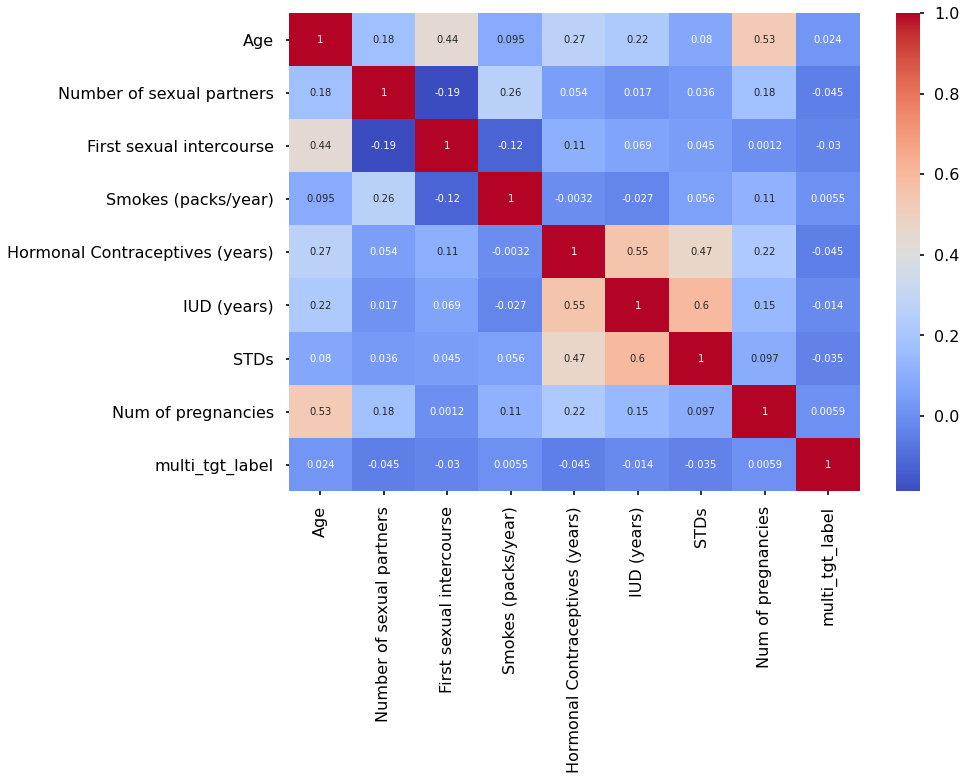

In [188]:
with plt.style.context('seaborn-poster'):
    sns.heatmap(pd.concat([pd.DataFrame(pt_new_X1,columns=new_X1.columns),y1_train],axis=1).corr(),cbar=True,cmap='coolwarm',annot=True)

In [116]:
from sklearn.preprocessing import PowerTransformer

In [117]:
pt = PowerTransformer()

#### ***`AGE`***

(array([128., 159., 130.,  71.,  19.,   5.,   0.,   0.,   1.,   1.]),
 array([13. , 20.1, 27.2, 34.3, 41.4, 48.5, 55.6, 62.7, 69.8, 76.9, 84. ]),
 <BarContainer object of 10 artists>)

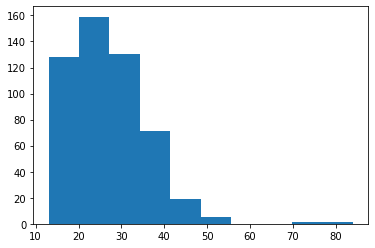

In [121]:
plt.hist(new_X1['Age'])

(array([ 17.,  35., 104.,  84., 112.,  96.,  50.,  14.,   0.,   2.]),
 array([-2.45631335, -1.86055602, -1.26479869, -0.66904137, -0.07328404,
         0.52247329,  1.11823062,  1.71398794,  2.30974527,  2.9055026 ,
         3.50125993]),
 <BarContainer object of 10 artists>)

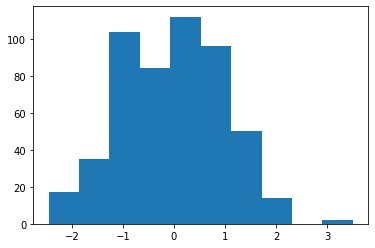

In [119]:
plt.hist(pt.fit_transform(X=new_X1[['Age']]))

#### ***`Number of Sexual Partners`***

(array([426.,  80.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <BarContainer object of 10 artists>)

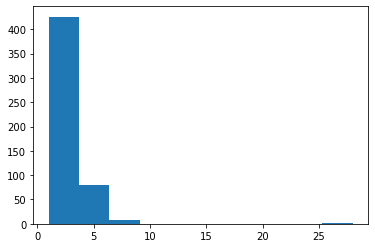

In [122]:
plt.hist(new_X1['Number of sexual partners'])

(array([121.,   0., 174., 131.,  76.,   8.,   3.,   0.,   0.,   1.]),
 array([0.        , 0.33322045, 0.6664409 , 0.99966135, 1.3328818 ,
        1.66610226, 1.99932271, 2.33254316, 2.66576361, 2.99898406,
        3.33220451]),
 <BarContainer object of 10 artists>)

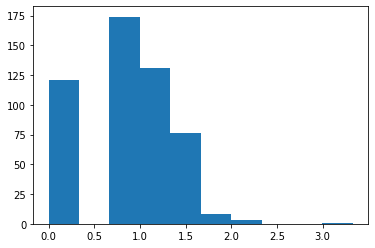

In [127]:
plt.hist(pt.fit_transform(X=new_X1[['Number of sexual partners']]))

#### ***`First sexual intercourse`***

(array([  8.,  66., 161., 173.,  66.,  22.,   4.,   8.,   5.,   1.]),
 array([10. , 12.2, 14.4, 16.6, 18.8, 21. , 23.2, 25.4, 27.6, 29.8, 32. ]),
 <BarContainer object of 10 artists>)

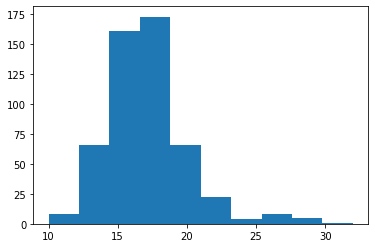

In [129]:
plt.hist(new_X1['First sexual intercourse'])

(array([  1.,   1.,   6.,  13.,  53., 161., 173.,  78.,  14.,  14.]),
 array([-4.57611665, -3.80558295, -3.03504925, -2.26451555, -1.49398185,
        -0.72344815,  0.04708555,  0.81761925,  1.58815295,  2.35868665,
         3.12922035]),
 <BarContainer object of 10 artists>)

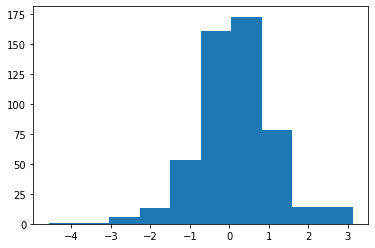

In [130]:
plt.hist(pt.fit_transform(X=new_X1[['First sexual intercourse']]))

#### ***`Smokes (packs/year)`***

(array([500.,   7.,   3.,   1.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <BarContainer object of 10 artists>)

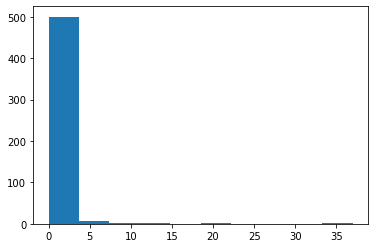

In [131]:
plt.hist(new_X1['Smokes (packs/year)'])

(array([434.,   1.,   4.,   0.,   1.,   1.,   4.,   1.,   8.,  60.]),
 array([-0.41691125, -0.11650755,  0.18389616,  0.48429986,  0.78470356,
         1.08510726,  1.38551097,  1.68591467,  1.98631837,  2.28672208,
         2.58712578]),
 <BarContainer object of 10 artists>)

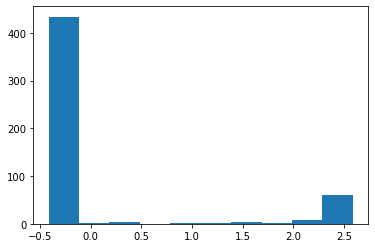

In [132]:
plt.hist(pt.fit_transform(X=new_X1[['Smokes (packs/year)']]))

#### ***`Hormonal Contraceptives (years)`***

(array([382.,  65.,  38.,  14.,   6.,   4.,   4.,   0.,   0.,   1.]),
 array([-1. ,  2.1,  5.2,  8.3, 11.4, 14.5, 17.6, 20.7, 23.8, 26.9, 30. ]),
 <BarContainer object of 10 artists>)

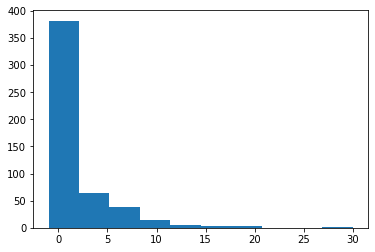

In [135]:
plt.hist(new_X1['Hormonal Contraceptives (years)'])

(array([ 55.,   0.,   0., 220.,  80.,  35.,  57.,  44.,  18.,   5.]),
 array([-1.94880721, -1.49267989, -1.03655257, -0.58042525, -0.12429793,
         0.33182939,  0.78795671,  1.24408403,  1.70021135,  2.15633867,
         2.61246599]),
 <BarContainer object of 10 artists>)

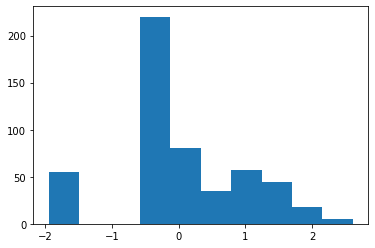

In [136]:
plt.hist(pt.fit_transform(X=new_X1[['Hormonal Contraceptives (years)']]))

#### ***`IUD (years)`***

(array([468.,  17.,   5.,  11.,   8.,   0.,   2.,   0.,   1.,   2.]),
 array([-1.,  1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19.]),
 <BarContainer object of 10 artists>)

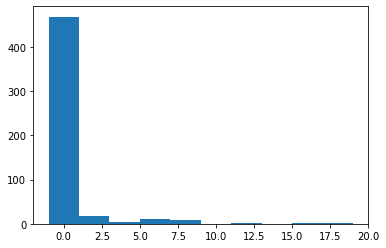

In [137]:
plt.hist(new_X1['IUD (years)'])

(array([ 55.,   0.,   0.,   0., 398.,  15.,  17.,   5.,  19.,   5.]),
 array([-2.35112595, -1.79364499, -1.23616403, -0.67868307, -0.12120211,
         0.43627885,  0.99375981,  1.55124077,  2.10872173,  2.66620269,
         3.22368365]),
 <BarContainer object of 10 artists>)

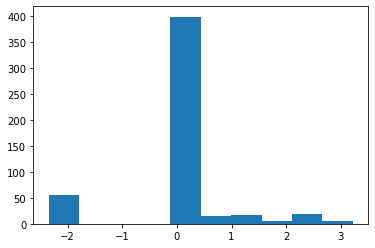

In [138]:
plt.hist(pt.fit_transform(X=new_X1[['IUD (years)']]))

#### ***`Num of pregnancies`***

(array([177., 148.,  89.,  61.,  22.,  11.,   3.,   2.,   0.,   1.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

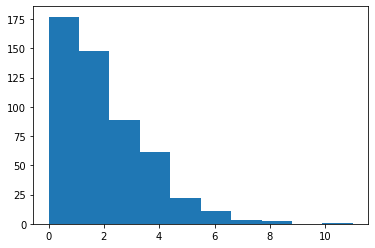

In [139]:
plt.hist(new_X1['Num of pregnancies'])

(array([ 10.,   0., 167.,   0., 148.,  89.,  61.,  33.,   5.,   1.]),
 array([-2.79700177, -2.20199621, -1.60699064, -1.01198507, -0.4169795 ,
         0.17802607,  0.77303164,  1.36803721,  1.96304278,  2.55804835,
         3.15305391]),
 <BarContainer object of 10 artists>)

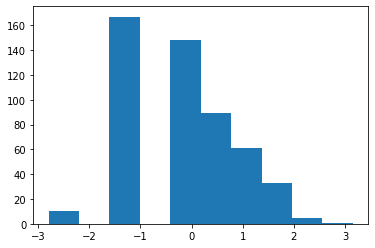

In [140]:
plt.hist(pt.fit_transform(X=new_X1[['Num of pregnancies']]))

In [128]:
new_X1.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)',
       'STDs', 'Num of pregnancies'],
      dtype='object')

### **`Transforming the Dataset`**

In [142]:
pt_new_X1 = pt.fit_transform(new_X1)

In [143]:
pt_new_X1.shape

(514, 8)

### **`OverSampling Data`**

#### **1. Synthetic Minority Oversampling Technique(SMOTE)**

In [193]:
from imblearn.over_sampling import SMOTE

In [194]:
oversample = SMOTE()

In [195]:
X_os, y_os = oversample.fit_resample(ss_new_X1, y1)

In [196]:
X_os.shape, y_os.shape, y_os.value_counts()

((962, 19),
 (962, 1),
 Biopsy
 1.0       481
 0.0       481
 dtype: int64)

#### **2. Random Over Sampling**

In [144]:
from imblearn.over_sampling import RandomOverSampler

In [145]:
random_oversample = RandomOverSampler(random_state=33)

In [146]:
X_ros, y_ros = random_oversample.fit_resample(pt_new_X1, y1_train)

In [147]:
X_ros.shape, y_ros.shape, y_ros.value_counts()

((1812, 8),
 (1812,),
 4    453
 3    453
 2    453
 0    453
 Name: multi_tgt_label, dtype: int64)

## **`Models Evaluation`**
### **`KNN`**

In [179]:
from sklearn.model_selection import GridSearchCV

In [182]:
clf = KNeighborsClassifier()

param_dist = {"n_neighbors": np.arange(1,22,2),
              "weights": ['uniform', 'distance'],
              "algorithm": ['ball_tree', 'kd_tree', 'brute'],
              "leaf_size": [15,20,25,35,40],
              "p": [1,2,3,4]}

rsh = GridSearchCV(estimator=clf,param_grid=param_dist,cv=10,scoring='precision_weighted')
rsh.fit(X_ros,y_ros)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 20, 25, 35, 40],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21]),
                         'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             scoring='precision_weighted')

In [183]:
results = pd.DataFrame(rsh.cv_results_)

In [184]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008399,0.000663,0.040694,0.003094,ball_tree,15,1,1,uniform,"{'algorithm': 'ball_tree', 'leaf_size': 15, 'n...",0.969063,0.970911,0.989420,0.969679,0.968859,0.968859,0.994595,0.965346,0.953968,0.969733,0.972044,0.011061,91
1,0.008985,0.001015,0.015913,0.002448,ball_tree,15,1,1,distance,"{'algorithm': 'ball_tree', 'leaf_size': 15, 'n...",0.969063,0.970911,0.989420,0.969679,0.968859,0.968859,0.994595,0.965346,0.953968,0.969733,0.972044,0.011061,91
2,0.009670,0.002135,0.051081,0.011499,ball_tree,15,1,2,uniform,"{'algorithm': 'ball_tree', 'leaf_size': 15, 'n...",0.965536,0.975275,0.984461,0.979035,0.973631,0.973631,0.994595,0.965346,0.968902,0.960171,0.974058,0.009615,61
3,0.013551,0.003830,0.030306,0.007902,ball_tree,15,1,2,distance,"{'algorithm': 'ball_tree', 'leaf_size': 15, 'n...",0.965536,0.975275,0.984461,0.979035,0.973631,0.973631,0.994595,0.965346,0.968902,0.960171,0.974058,0.009615,61
4,0.019858,0.005192,0.181071,0.030152,ball_tree,15,1,3,uniform,"{'algorithm': 'ball_tree', 'leaf_size': 15, 'n...",0.960159,0.966716,0.989420,0.979035,0.978601,0.979035,0.994595,0.955720,0.964130,0.973882,0.974129,0.011874,31


In [189]:
def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

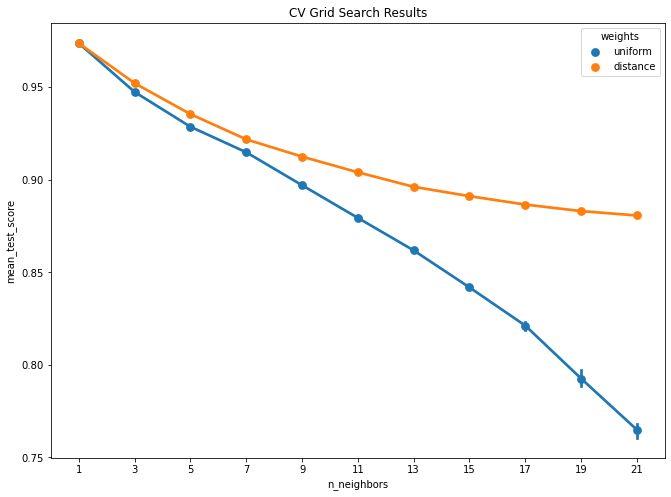

In [191]:
plot_cv_results(results,'n_neighbors','weights');

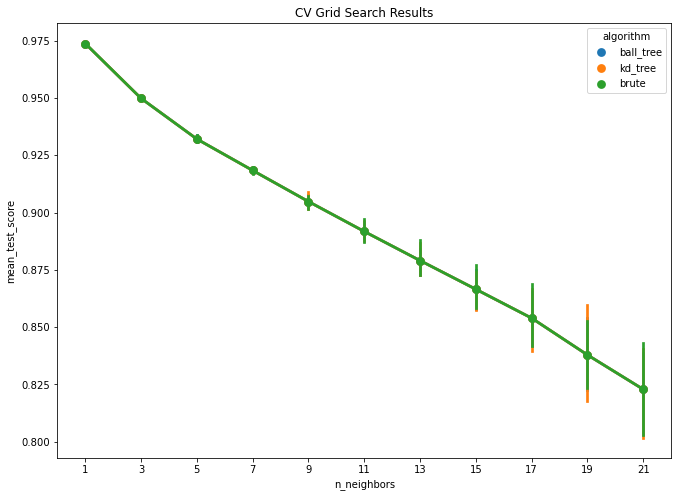

In [192]:
plot_cv_results(results,'n_neighbors','algorithm');

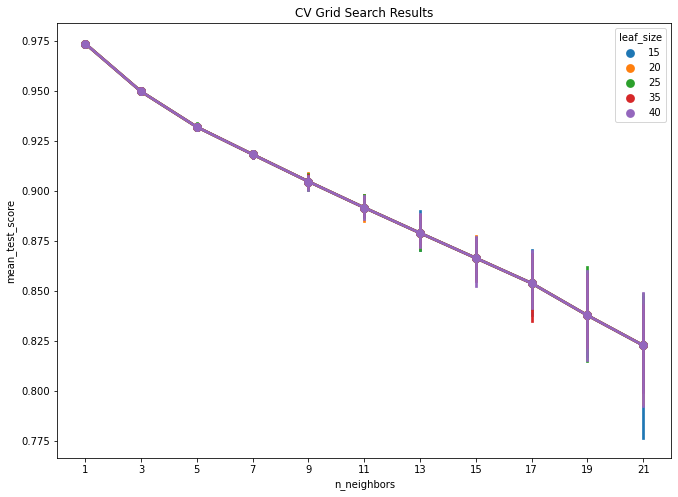

In [194]:
plot_cv_results(results,'n_neighbors','leaf_size');

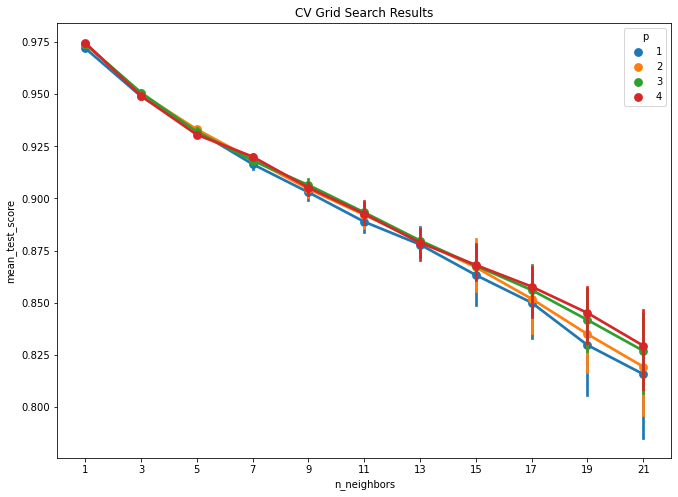

In [193]:
plot_cv_results(results,'n_neighbors','p');

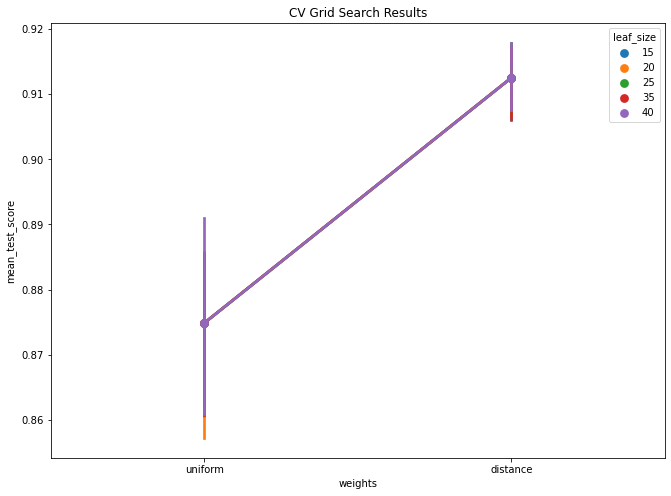

In [195]:
plot_cv_results(results,'weights','leaf_size');

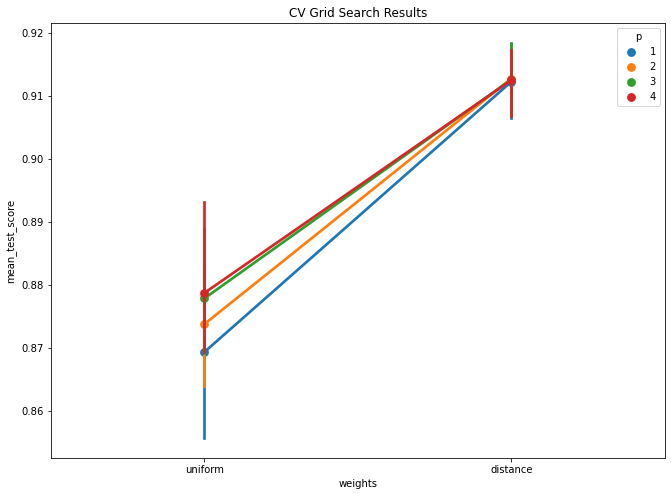

In [196]:
plot_cv_results(results,'weights','p');

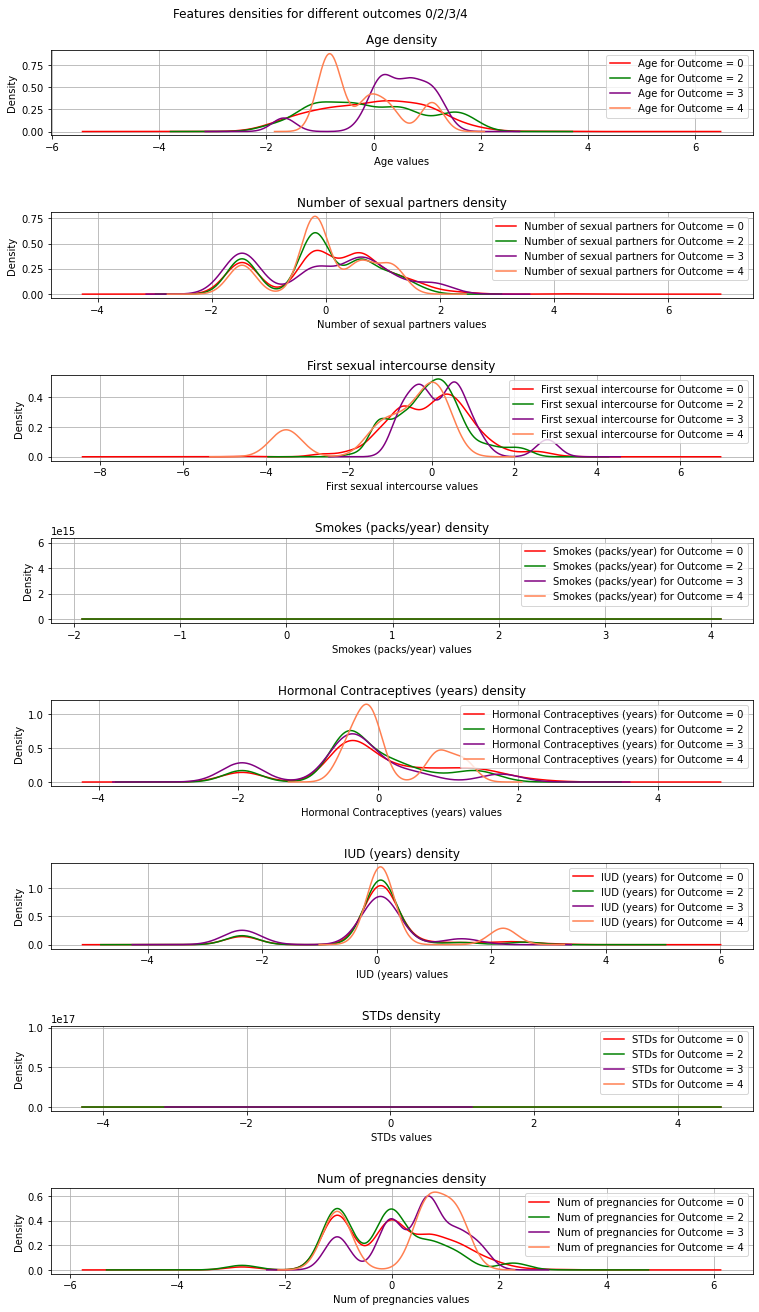

In [222]:
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt


def plot_densities(data):
    '''
    Plot features densities depending on the outcome values
    '''
    # change fig size to fit all subplots beautifully 
    rcParams['figure.figsize'] = 15, 20

    # separate data based on outcome values 
    outcome_0 = data[data['multi_tgt_label'] == 0]
    outcome_2 = data[data['multi_tgt_label'] == 2]
    outcome_3 = data[data['multi_tgt_label'] == 3]
    outcome_4 = data[data['multi_tgt_label'] == 4]

    # init figure
    fig, axs = plt.subplots(8, 1)
    fig.suptitle('Features densities for different outcomes 0/2/3/4')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95,
                        wspace = 0.2, hspace = 0.9)

    # plot densities for outcomes
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        outcome_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' for Outcome = 0')
        outcome_2[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' for Outcome = 2')
        outcome_3[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="purple", legend=True,
                                     label=column_name + ' for Outcome = 3')
        outcome_4[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="coral", legend=True,
                                     label=column_name + ' for Outcome = 4')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
    plt.show()
    fig.savefig('densities.png')

# load your data 
data  = pd.concat([pd.DataFrame(X_ros,columns=new_X1.columns),y_ros],axis=1)
names = list(data.columns)
# print(names)
# plot correlation & densities
plot_densities(data)

In [215]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [223]:
X_Train_embedded = TruncatedSVD(n_components=2, random_state=0).fit_transform(X_ros)

In [242]:
X_Train_embedded = TSNE(n_components=2,n_iter=5000,perplexity=30,learning_rate=20).fit_transform(X_ros)

In [153]:
cross_val_score(estimator=KNeighborsClassifier(n_neighbors=9,weights='distance',algorithm='kd_tree'),X=X_ros,y=y_ros,cv=10,
                n_jobs=-1,scoring='recall_weighted').mean()

0.8912877178070548

In [151]:
cross_val_score(estimator=KNeighborsClassifier(n_neighbors=9,weights='distance',algorithm='kd_tree'),X=X_ros,y=y_ros,cv=10,
                n_jobs=-1,scoring='precision_weighted').mean()

0.9126598457411287

In [243]:
# Loading some example data
X_db = np.array(X_Train_embedded)
y_db = np.array(y_ros)

# grid cell size
h = .02

x_min, x_max = X_db[:, 0].min() - 1, X_db[:, 0].max() + 1
y_min, y_max = X_db[:, 1].min() - 1, X_db[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

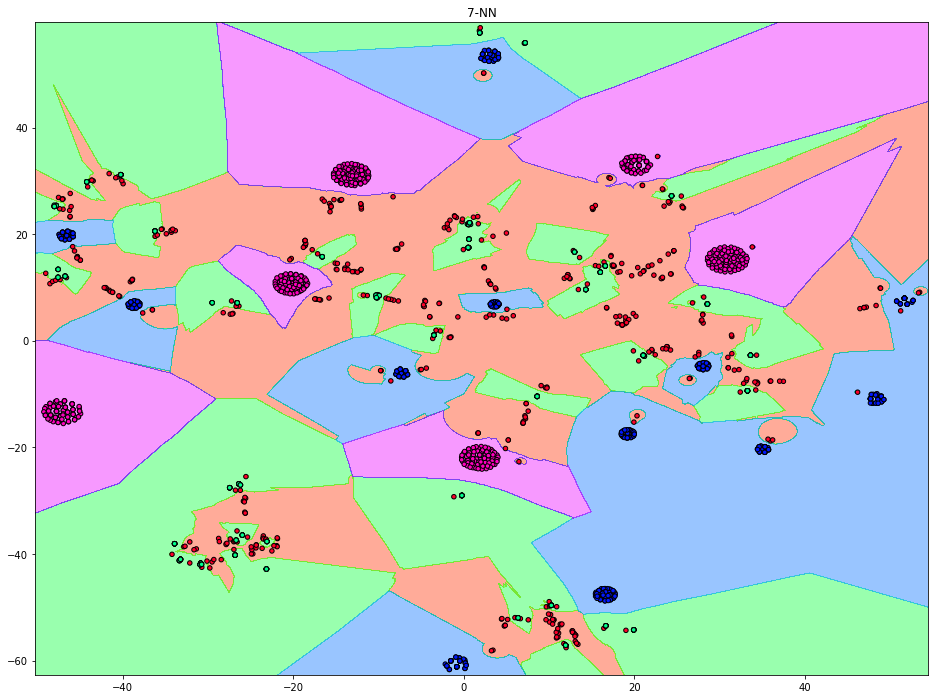

In [244]:
f, axarr = plt.subplots(1,1, figsize=(16, 12))    ## Defining a subplot with 1 row and 1 col 
clf11 = KNeighborsClassifier(n_neighbors=7,weights='distance')   ## Instantiating the KNN algo
clf11.fit(X_db,y_db)        
Z = clf11.predict(np.c_[xx.ravel(), yy.ravel()])  ## This provide the flattened array for prediction
Z = Z.reshape(xx.shape)
axarr.contourf(xx, yy, Z, alpha=0.4,cmap='gist_rainbow')  ## This plots the countour from the grid
axarr.scatter(X_db[:, 0], X_db[:, 1], c=y_db,s=20, edgecolor='k',cmap='gist_rainbow')  ## This creates the scatter plots of data observations
axarr.set_title('{}-NN'.format(7))
plt.show()

## **Reference Links**

**1. `Cervical Cancer`**
[Click here](https://www.cancer.gov/types/cervical)

**2. `Sexually Transmitted Diseases`**
[Click here](https://www.healthychildren.org/English/health-issues/conditions/sexually-transmitted/Pages/Types-of-Sexually-Transmitted-Infections.aspx)
- [Condylomatosis](https://autotesthiv.eu/en/infezioni_sessualmente_trasmesse/condylomatosis/)
    
**3. `CIN`**
[Link-1](https://my.clevelandclinic.org/health/diseases/15678-cervical-intraepithelial-neoplasia-cin#:~:text=Cervical%20intraepithelial%20neoplasia%20(CIN)%20is,the%20surface%20of%20the%20cervix.)

[Link-2](https://www.cancertherapyadvisor.com/home/decision-support-in-medicine/obstetrics-and-gynecology/cervical-pre-invasive-diagnosis-and-treatment/)

**4. `HPV`**
[Click here](https://my.clevelandclinic.org/health/diseases/11901-hpv-human-papilloma-virus)

**5. `Genital Warts`**
[Click here](https://www.mayoclinic.org/diseases-conditions/genital-warts/symptoms-causes/syc-20355234)

**6. `Cervical Biopsy`**
[Click here](https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/cervical-biopsy#:~:text=A%20cervical%20biopsy%20is%20a,be%20done%20in%20several%20ways.)


## **Dataset Links**

[UCI ML](https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29#)

[Kaggle](https://www.kaggle.com/loveall/cervical-cancer-risk-classification)


## **Research papers**
##### ***`Papers published on Cervical Cancer using this dataset`***

https://arxiv.org/ftp/arxiv/papers/1812/1812.10383.pdf

https://www.researchgate.net/publication/331372554_Cervical_Cancer_Test_Identification_Classifier_using_Decision_Tree_Method

## **Vocabulary**

**`Invasive`** That can spread quickly and harmfully from one to another.

**`Contaminated`** Having been made impure by exposure to or addition of a poisonous or polluting substance.

**`Plunged`** Suddenn decrease or sharp fall.

**`STD`** stands for Sexually Transmitted Disease.

**`IUD`** An intrauterine device, also known as intrauterine contraceptive device or coil, is a small, often T-shaped birth control device that is inserted into the uterus to prevent pregnancy.

**`Dx`** Dx is a short hand of Diagnosis in medical domain.

**`HPV`** HPV stands for Human Papilloma Virus. 
- An infection that causes warts in various parts of the body, depending on the strain. Human papillomavirus (HPV) is the most common Sexually Transmitted Infection (STI).
- Many people with HPV don't develop any symptoms but can still infect others through sexual contact. Symptoms may include warts on the genitals or surrounding skin.
- There's no cure for the virus and warts may go away on their own. Treatment focuses on removing the warts. A vaccine that prevents the HPV strains most likely to cause genital warts and cervical cancer is recommended for boys and girls.

**`Genital Warts`** A small bump on the genitals(human or animal reproductive organs) caused by a common sexually transmitted infection.

**`Cervix`** The cervix is the lower portion of the uterus. It is approximately two inches long, and it's tubular in shape. It widens during childbirth to allow for the passage of the baby. It also allows for the passage of menstrual fluid from the uterus, and sperm needs to travel through the cervix in order to reach the uterus.

**`Lesion`** A lesion is any damage or abnormal change in the tissue of an organism, usually caused by disease or trauma.

**`CIN`** Cervical intraepithelial neoplasia (CIN) is a precancerous condition in which abnormal cells grow on the surface of the cervix. It is also referred as pre-invasive lesions of Cervix.

**`Pre-invasive cancer`** A cluster of malignant cells that has not yet invaded the deeper epithelial tissue or spread to other parts of the body. 

**`Epithelial tissue`** These are widespread throughout the body. They form the covering of all body surfaces, line body cavities and hollow organs, and are the major tissue in glands. 
- They perform a variety of functions that include protection, secretion, absorption, excretion, filtration, diffusion, and sensory reception.
- Epithelial layers contain no blood vessels, so they must receive nourishment via diffusion of substances from the underlying connective tissue, through the basement membrane.

**`Why is cancer more common in epithelial tissue?`**
Since these tissues are often exposed to environmental insults such as chemicals and solar radiation and are often divide rapidly to replace lost cells, many cancers arise in epithelial tissues. cells, those cells that line the surface of our skin and organs.

**`HIV`** stands for Human immunodeficiency virus. It is a virus that attacks the body's immune system. If HIV is not treated, it can lead to **`AIDS`** (Acquired Immunodeficiency Syndrome). 
- HIV causes AIDS and interferes with the body's ability to fight infections. The virus can be transmitted through contact with infected blood, semen or vaginal fluids.
- Within a few weeks of HIV infection, flu-like symptoms such as fever, sore throat and fatigue can occur. Then the disease is usually asymptomatic until it progresses to AIDS. AIDS symptoms include weight loss, fever or night sweats, fatigue and recurrent infections.
- No cure exists for AIDS, but strict adherence to antiretroviral regimens (ARVs) can dramatically slow the disease's progress as well as prevent secondary infections and complications.

**`IV drug use`** Intraveneous drug use is the injection of chemicals into the body via a hypodermic needle into a vein.

**`Immunosuppressant Medicines`** Medicines which are used to lower the working or effects of immune system for a time being. Transplant patients must take immunosuppressant medications in order for the donor's cells to establish themselves in the transplant patient's body.